# Exploratívna analýza
### Projekt z predmetu Inteligentná analýza údajov
#### Martin L. Zachar, Štefan Šebeň
## 1 Všeobecný pohľad na dátový súbor

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline


pd.set_option('display.max_columns', 50)

Načítali sme dáta a nechali si zobraziť prvých pár riadkov, aby sme získali prvý pohľad. Už z tohto sme si povšimli niekoľkých zaujímavostí:
- prvý stĺpec s názvom Unnamed 0 bude najskôr index, ktorému takéto meno priradil po načítaní program

- v dátovom súbore majú atribúty T3, FTI, TBG akýsi "sesterský" atribút (T3 measured, FTI measured a TBG measured), ktorý s veľkou pravdepodobnosťou je booleovský a má vyjadrovať, či bol daný číselný atribút meraný   

- atribút fnlwgt, ktorý má na pohľad vyjadrovať akúsi váhu má hodnoty merané v státisíckach

- atribút education a education-num majú v dvoch z riadkoch rovnaké hodnoty, je možné, že vyjadrujú niečo podobné

- v dátovom súbore sa nachádza ako stĺpec vyjadrujúci vek meraného subjektu, tak aj stĺpec zaznamenávajúci rok jeho narodenia

- v stĺpcu roku narodenia nie je konzistentný formát dátumu

- v atribúte medical_info je zbalený pravdepodbne JSON s ďalšími atribútmi meraní

In [2]:
train_data = pd.read_csv('data/train.csv')
train_data.head()

,Unnamed: 0,age,on thyroxine,query on thyroxine,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,TSH,T3 measured,T3,TT4,T4U,FTI measured,TBG measured,TBG,referral source,class,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,medical_info
0,0,82.0,f,f,f,f,f,f,f,f,f,2.2,t,1.0,68.0,0.77,t,f,?,SVI,negative.|991,Local-gov,141649,Assoc-voc,11,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States,1935-05-20 00:00:00,"{'TSH measured':'t','sex':'M','query hyperthyr..."
1,1,50.0,f,f,f,t,f,f,f,f,f,76.0,t,0.5,22.0,1.12,t,f,?,other,negative.|1685,Local-gov,177599,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,0,0,35,United-States,67-08-03,"{'TSH measured':'t','sex':'F','query hyperthyr..."
2,2,41.0,f,f,f,f,f,f,f,f,f,NaN,t,2.0,99.0,0.96,t,f,?,other,negative.|3504,Self-emp-not-inc,102631,Some-college,10,Widowed,Farming-fishing,Unmarried,White,0,0,50,United-States,1976-05-02,"{'TSH measured':'f','sex':'F','query hyperthyr..."
3,3,73.0,f,f,f,f,f,f,f,f,f,0.7,t,2.0,116.0,0.99,t,f,?,other,negative.|1942,private,272338,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,0,0,25,United-States,44-10-08,"{'TSH measured':'t','sex':'F','query hyperthyr..."
4,4,64.0,f,f,f,f,f,f,f,f,f,2.0,t,1.8,80.0,0.91,t,f,?,SVHC,negative.|2009,Self-emp-inc,368825,Some-college,10,Married-civ-spouse,Sales,Husband,White,0,0,60,United-States,1953-05-01,"{'TSH measured':'t','sex':'M','query hyperthyr..."


Vypísali sme si informácie o stĺpcoch. Zistili sme, že v dátovom súbore je 2800 záznamov s 35 atribútmi. 

Do očí nam udrelo i to, že i keď zdánlivo atribút TT4 nadobúda číselné hodnoty, je zaradený medzi kategorické atribúty. 

Dvojica atribútov TBG measured a TBG je tiež pomerne zvláštna, pretože by sa dalo čakať, že TBG measured bude booleovská hodnota vyjadrujúca, či bolo TBG merané, avšak TBG je zaradené medzi kategorické atribúty a k tomu ešte na zobrazenej časti dátového súboru nadobúda len hodnotu ? vyjadrujúcu, že nie je meraná.

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 35 columns):
Unnamed: 0            2800 non-null int64
age                   2519 non-null float64
on thyroxine          2800 non-null object
query on thyroxine    2800 non-null object
pregnant              2800 non-null object
thyroid surgery       2800 non-null object
I131 treatment        2800 non-null object
lithium               2800 non-null object
goitre                2800 non-null object
tumor                 2800 non-null object
hypopituitary         2800 non-null object
TSH                   2516 non-null float64
T3 measured           2800 non-null object
T3                    2215 non-null float64
TT4                   2451 non-null object
T4U                   2503 non-null float64
FTI measured          2800 non-null object
TBG measured          2800 non-null object
TBG                   2800 non-null object
referral source       2800 non-null object
class                 2800 non

Uistili sme sa, že stĺpec Unnamed: 0 je skutočne indexom dátového súboru v jeho pôvodnom formáte a to tak, že sme ho porovnali s postupnosťou prirodzených čísel od 1 po počet záznamov v dátovom súbore. Nebola ani jedna hodnota, ktorá by sa medzi týmto stĺpcom a postupnosťou odlišovala, takže Unnamed: 0 bol indexom. 

In [4]:
b = pd.Series(train_data['Unnamed: 0']) == pd.Series(np.arange(train_data.shape[0]))
b[b == False].count()

0

Vrátili sme Unnamed: 0 ako index dátového súboru a premenovali sme ho na "id".

In [5]:
train_data = train_data.set_index('Unnamed: 0')
train_data.index.names = ['id']

Rozhodli preskúmať, aké dáta a koľko atribútov vlastne schováva dátová štruktúra zabalená do stĺpca "medical_info".

In [6]:
train_data['medical_info'][0]

"{'TSH measured':'t','sex':'M','query hyperthyroid':'f','TT4 measured':'t','on antithyroid medication':'f','FTI':'88','sick':'f','T4U measured':'t','psych':'f','query hypothyroid':'f'}"

Aby sme už všetky atribúty dátového súboru mali pred ďalšou analýzou pripravené a zaradené do vlastných stĺpov, takže by sme ich mohli plnohodnotne preskúmavať, "rozbalili" sme dátovú štroktúru v stĺpci medical_info do vlastných stĺpcov. Atribút medical_info sme odstránili, keďže už nebol potrebný.

In [7]:
import json
raw = train_data.loc[1, 'medical_info']
raw = raw.replace("'", '"')
data = json.loads(raw)

#pridanie stlpcov
for k in data.keys():
    train_data[k] = np.nan

#naplnenie zaznamov hodnotami z medical_info
for i in range(train_data.shape[0]):
    raw = train_data['medical_info'][i]
    raw = raw.replace("'", '"')
    data = json.loads(raw)
    for att in data.keys():
        train_data.loc[i, att] = data[att]
    
#odstranenie nepotrebneho stlpca
train_data = train_data.drop(columns=['medical_info'])

Zopakovali sme analýzu, ktorú sme doteraz vykonali a pozreli sa, ako dátový súbor vyzerá po rozbalení stĺpca medical_info. Pribudlo 10 stĺpcov. Povšimli sme si, že atribút FTI bol radený medzi kategorické atribúty, i keď zdánlivo obsahuje číslené hodnoty.

In [8]:
train_data.head()

,age,on thyroxine,query on thyroxine,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,TSH,T3 measured,T3,TT4,T4U,FTI measured,TBG measured,TBG,referral source,class,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,TSH measured,sex,query hyperthyroid,TT4 measured,on antithyroid medication,FTI,sick,T4U measured,psych,query hypothyroid
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,82.0,f,f,f,f,f,f,f,f,f,2.2,t,1.0,68.0,0.77,t,f,?,SVI,negative.|991,Local-gov,141649,Assoc-voc,11,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States,1935-05-20 00:00:00,t,M,f,t,f,88,f,t,f,f
1,50.0,f,f,f,t,f,f,f,f,f,76.0,t,0.5,22.0,1.12,t,f,?,other,negative.|1685,Local-gov,177599,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,0,0,35,United-States,67-08-03,t,F,f,t,f,19,f,t,f,f
2,41.0,f,f,f,f,f,f,f,f,f,NaN,t,2.0,99.0,0.96,t,f,?,other,negative.|3504,Self-emp-not-inc,102631,Some-college,10,Widowed,Farming-fishing,Unmarried,White,0,0,50,United-States,1976-05-02,f,F,f,t,f,104,f,t,f,f
3,73.0,f,f,f,f,f,f,f,f,f,0.7,t,2.0,116.0,0.99,t,f,?,other,negative.|1942,private,272338,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,0,0,25,United-States,44-10-08,t,F,f,t,f,117,f,t,f,f
4,64.0,f,f,f,f,f,f,f,f,f,2.0,t,1.8,80.0,0.91,t,f,?,SVHC,negative.|2009,Self-emp-inc,368825,Some-college,10,Married-civ-spouse,Sales,Husband,White,0,0,60,United-States,1953-05-01,t,M,f,t,f,88,f,t,f,f


In [9]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 0 to 2799
Data columns (total 43 columns):
age                          2519 non-null float64
on thyroxine                 2800 non-null object
query on thyroxine           2800 non-null object
pregnant                     2800 non-null object
thyroid surgery              2800 non-null object
I131 treatment               2800 non-null object
lithium                      2800 non-null object
goitre                       2800 non-null object
tumor                        2800 non-null object
hypopituitary                2800 non-null object
TSH                          2516 non-null float64
T3 measured                  2800 non-null object
T3                           2215 non-null float64
TT4                          2451 non-null object
T4U                          2503 non-null float64
FTI measured                 2800 non-null object
TBG measured                 2800 non-null object
TBG                          2800 non-n

Nechali sme si vypísať unikátne hodnoty, ktoré FTI nadobúda a zistili sme, že FTI je skutočne číselný atribút. Skonvertovali sme ho teda pre potreby ďalšej analýzy do odpovedajúceho formátu.

In [10]:
print("Unikatne hodnoty FTI: \n", train_data['FTI'].unique())

Unikatne hodnoty FTI: 
 ['88' '19' '104' '117' '103' '112' '200' '129' '126' '127' '87' '90' '105'
 '107' '96' '101' '109' '89' '191' '113' '115' '74' '94' '?' '152' '99'
 '134' '116' '78' '76' '125' '83' '235' '75' '173' '207' '140' '98' '120'
 '106' '93' '138' '91' '209' '232' '102' '92' '160' '131' '68' '121' '110'
 '97' '108' '119' '149' '67' '133' '145' '85' '111' '124' '130' '165'
 '172' '122' '123' '147' '164' '114' '69' '100' '171' '148' '70' '73' '95'
 '65' '53' '9' '163' '86' '79' '143' '132' '128' '146' '118' '72' '153'
 '214' '137' '217' '51' '142' '82' '188' '144' '39' '64' '177' '28' '60'
 '41' '61' '156' '185' '182' '10' '170' '80' '203' '155' '247' '190' '135'
 '154' '52' '77' '150' '151' '24' '47' '197' '34' '224' '169' '168' '84'
 '213' '195' '222' '204' '194' '136' '81' '54' '139' '58' '29' '50' '189'
 '174' '46' '49' '71' '158' '48' '216' '166' '178' '180' '162' '66' '13'
 '253' '274' '244' '62' '157' '167' '395' '14' '349' '176' '221' '26'
 '175' '32' '220' '33' '8

In [11]:
train_data['FTI'] = pd.to_numeric(train_data['FTI'], errors='coerce')

Podobne sme vykonali aj s atribútom TT4, u ktorého sme tento problém tiež spomínali už vyššie. Ukázalo sa, že náš úsodok bol správny a chybu vo formáte sme pre potreby analýzy napravili.

In [12]:
print("Unikatne hodnoty TT4: \n", train_data['TT4'].unique())

Unikatne hodnoty TT4: 
 ['68.0' '22.0' '99.0' '116.0' '80.0' '114.0' '82.0' '164.0' '118.0'
 '110.0' '101.0' '87.0' '78.0' '91.0' '96.0' '89.0' '103.0' '191.0' '??'
 '70.0' '106.0' '104.0' nan '132.0' '67.0' '113.0' '76.0' '56.0' '205.0'
 '136.0' '102.0' '173.0' '166.0' '137.0' '84.0' '107.0' '133.0' '105.0'
 '126.0' '196.0' '124.0' '246.0' '94.0' '95.0' '120.0' '198.0' '112.0'
 '160.0' '123.0' '139.0' '71.0' '73.0' '88.0' '213.0' '97.0' '130.0'
 '117.0' '111.0' '108.0' '75.0' '145.0' '129.0' '109.0' '72.0' '121.0'
 '134.0' '90.0' '151.0' '289.0' '163.0' '79.0' '162.0' '131.0' '74.0'
 '157.0' '119.0' '147.0' '93.0' '176.0' '86.0' '156.0' '54.0' '100.0'
 '125.0' '77.0' '141.0' '63.0' '144.0' '146.0' '154.0' '81.0' '200.0'
 '10.0' '85.0' '83.0' '128.0' '92.0' '181.0' '204.0' '127.0' '142.0'
 '135.0' '235.0' '230.0' '115.0' '223.0' '122.0' '44.0' '98.0' '42.0'
 '57.0' '140.0' '184.0' '32.0' '239.0' '38.0' '48.0' '149.0' '197.0'
 '174.0' '64.0' '12.0' '143.0' '237.0' '263.0' '250.0' '210.0

In [13]:
train_data['TT4'] = pd.to_numeric(train_data['TT4'], errors='coerce')

Do tretice sme sa rozhodli preskúmať aj atribút TBG, či uňho nie je tiež ten istý problém. Zistili sme, že atribút TBG bol zaradený medzi kategorické atribúty pre to, lebo nadobúda len hodnotu ?, ktorá najskôr značí, že atribút bol nemeraný. Toto sme si overeli preskúmaním unikátnych hodnôt atribútu TBG measured.

Po uistení, že TBG by malo skutočne vyjadrovať číselnú hodnotu sme ho presunuli medzi číselné atribúty, hoci vzhľadom na to, že je spoločne s atribútom TBG measured na dátový súbor konštantý by nemalo mať na výsledky vyplyv ani ich celkové odstránenie.

In [14]:
print("Unikatne hodnoty TBG: ", train_data['TBG'].unique())
print("Unikatne hodnoty TBG measured: ", train_data['TBG measured'].unique())

Unikatne hodnoty TBG:  ['?']
Unikatne hodnoty TBG measured:  ['f']


In [15]:
train_data['TBG'] = pd.to_numeric(train_data['TBG'], errors='coerce')

Atribút class je ten, proti ktorému budeme testovať, resp. o ktorom sa budeme snažiť rozhodovať. Tvoria ho však až dva údaje a to jednak výsledok testu a id testu. Rozdelili sme teda atribút do dvoch stĺpcov s názvami test a testID. Atribút test obsahuje výsledok testu, testID jeho id.

Atribút class sme už ako taký nepotrebovali a tak sme ho zahodili.

In [16]:
for i in range(train_data.shape[0]):
    train_data.loc[i, 'test'], train_data.loc[i, 'testID'] = str(train_data['class'][i]).split(".|")

    
train_data = train_data.drop(columns=['class'])

In [17]:
train_data.head()

,age,on thyroxine,query on thyroxine,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,TSH,T3 measured,T3,TT4,T4U,FTI measured,TBG measured,TBG,referral source,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,TSH measured,sex,query hyperthyroid,TT4 measured,on antithyroid medication,FTI,sick,T4U measured,psych,query hypothyroid,test,testID
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,82.0,f,f,f,f,f,f,f,f,f,2.2,t,1.0,68.0,0.77,t,f,NaN,SVI,Local-gov,141649,Assoc-voc,11,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States,1935-05-20 00:00:00,t,M,f,t,f,88.0,f,t,f,f,negative,991
1,50.0,f,f,f,t,f,f,f,f,f,76.0,t,0.5,22.0,1.12,t,f,NaN,other,Local-gov,177599,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,0,0,35,United-States,67-08-03,t,F,f,t,f,19.0,f,t,f,f,negative,1685
2,41.0,f,f,f,f,f,f,f,f,f,NaN,t,2.0,99.0,0.96,t,f,NaN,other,Self-emp-not-inc,102631,Some-college,10,Widowed,Farming-fishing,Unmarried,White,0,0,50,United-States,1976-05-02,f,F,f,t,f,104.0,f,t,f,f,negative,3504
3,73.0,f,f,f,f,f,f,f,f,f,0.7,t,2.0,116.0,0.99,t,f,NaN,other,private,272338,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,0,0,25,United-States,44-10-08,t,F,f,t,f,117.0,f,t,f,f,negative,1942
4,64.0,f,f,f,f,f,f,f,f,f,2.0,t,1.8,80.0,0.91,t,f,NaN,SVHC,Self-emp-inc,368825,Some-college,10,Married-civ-spouse,Sales,Husband,White,0,0,60,United-States,1953-05-01,t,M,f,t,f,88.0,f,t,f,f,negative,2009


Na záver tejto podčasti sme si ešte nechali vypísať, koľko neznámych hodnôt jednotlivé atribúty obsahujú a koľko ich teda budeme musieť riešiť v časti Predspacovania. Hodnoty atribútu TBG sa, prirodzene, nebudeme pokúšať upavovať.

In [18]:
for column in train_data.columns:
    b = train_data[column].isnull()
    c = b[b == True].count()
    if c != 0:
        print(column, ": ", c)

age :  281
TSH :  284
T3 :  585
TT4 :  448
T4U :  297
TBG :  2800
date_of_birth :  1
FTI :  295


# 2 Analýza jednotlivých atribútov
## 2.1 Číselné atribúty

Na začiatok sme si o každom zo číselných atribútov nechali vypísať deskriptívne štatistiky, aby sme získali prvotný prehľadom o tom, aké hodnoty približne stĺpce nadobúdajú a akú majú distribúciu týchto hodnôt.

Z tohto opisu sme urobili tieto zistenia:
- vek obsahuje minimálne jedného jednoznačného outliera s vekom 455 rokov, rozptyl hodnôt je však na očakávanej úrovni 
- vzhľadom na hodnoty kvartilov atribútu TSH a jeho rozptyl, aj atribút TSH obsahuje aspoň jednú odľahlú hodnotu 478
- T4U je zdánlivo v poriadku
- TBG nie je merané, takže nie je štatisticky opíasteľné
- atribúty capital-gain a capital-loss majú veľmi podivuhodnú distribúciu, keď podstatná väčšina nadobúdaných hodnôt je 0, avšak priemer, odchýlka aj maximum su podstatne vačšie
- uvažujúc ich medzikvartilový rozptyl, odchýlku, extrémy a priemer tak aj atribúty fnlwt, T3, hours-per-week, TT4 a FTI možno tiež obsahujú odľahlé hodnoty

In [19]:
train_data.describe()

,age,TSH,T3,TT4,T4U,TBG,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,FTI
count,2519.000000,2516.000000,2215.000000,2352.000000,2503.000000,0.0,2.800000e+03,2800.000000,2800.000000,2800.000000,2800.000000,2505.000000
mean,51.793569,4.672150,2.024966,108.990391,0.997912,NaN,1.859808e+05,4.150714,789.960714,75.960357,38.336429,110.787984
std,20.541137,21.449453,0.824600,35.622745,0.194390,NaN,1.009371e+05,327.452340,5813.819092,374.218100,11.877622,32.883986
min,1.000000,0.005000,0.050000,2.000000,0.310000,NaN,1.939500e+04,-1600.000000,0.000000,0.000000,1.000000,2.000000
25%,36.000000,0.440000,1.600000,88.000000,0.880000,NaN,1.185510e+05,9.000000,0.000000,0.000000,35.000000,93.000000
50%,54.000000,1.400000,2.000000,104.000000,0.980000,NaN,1.772160e+05,10.000000,0.000000,0.000000,40.000000,107.000000
75%,67.000000,2.600000,2.400000,125.000000,1.080000,NaN,2.276065e+05,13.000000,0.000000,0.000000,40.000000,124.000000
max,455.000000,478.000000,10.600000,430.000000,2.120000,NaN,1.097453e+06,1500.000000,99999.000000,3683.000000,99.000000,395.000000


Na tomto diagrame je jednoznačne vidieť odľahlú hodnotu s vekom 455 rokov. Môže sa jednať o preklep a skutočná hodnota môže mať 45 rokov, ide však len o jedno meranie, takže ho možno aj vylúčiť.

Pocet s vekom viac ako 120:  1


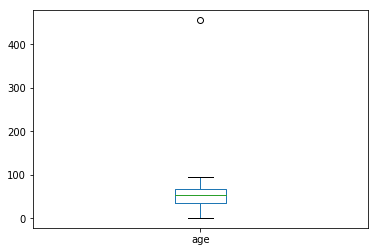

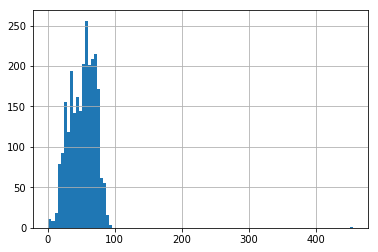

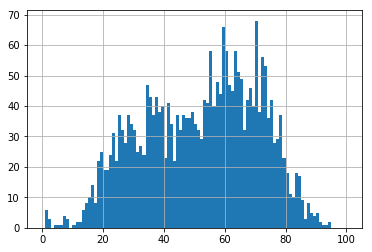

In [20]:
train_data['age'].plot.box()
plt.figure()
train_data['age'].hist(bins=100)
plt.figure()
train_data['age'].hist(bins=100, range=(0,100))
plt.figure()

print("Pocet s vekom viac ako 120: ", train_data['age'][train_data['age'] > 120].count())

Hodnoty TSH s viac ako 400 sú jednoznačne odľahlými hodnotami. Premrštené sa zdajú byť už aj hodnoty okolo nad 100, no o opaku vraví, že sa držia tesne chvosta distribúcie a následujú veľmi sploštenú normálnu distribúciu. Diskutabilné sú už aj hodnoty nad 8 či 10. Podľa merítka 1.5 násobného IQR by mali byť odľahlé, avšak o opaku vraví ich početnosť. Aj vysoký počet meraní okolo 0 zdá sa byť pomerne excesívny vzhľadom na očakávanú normálnu distribúciu, avšak to môže byť zapríčinené len nemožnosťou TSH klesnúť pod 0.

Pokúsime sa odstrániť či nahradiť hodnoty od 70. Odstrániť či nahradiť ešte viac hodnôt by bolo nanajvýš odvážne.

Pocet s TSH viac ako 70 :  27
Pocet s TSH viac ako 100 :  18
Pocet s TSH viac ako 400 :  3


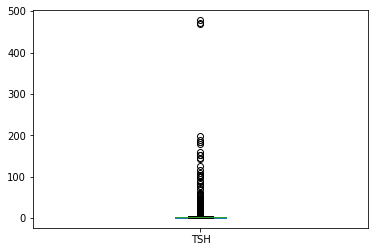

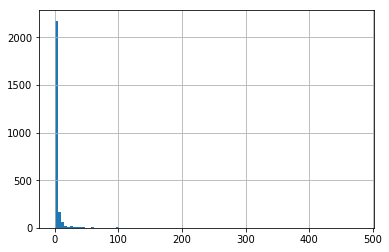

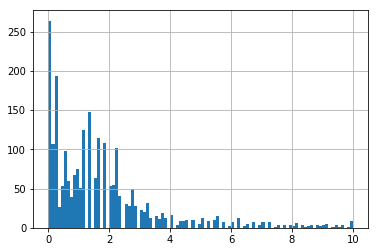

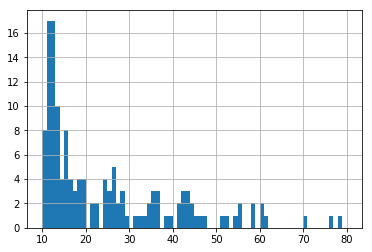

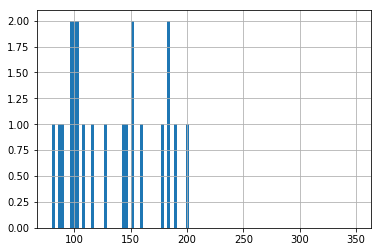

In [21]:
train_data['TSH'].plot.box()
plt.figure()
train_data['TSH'].hist(bins=100)
plt.figure()
train_data['TSH'].hist(bins=100, range=(0, 10.0))
plt.figure()
train_data['TSH'].hist(bins=70, range=(10.0, 80.0))
plt.figure()
train_data['TSH'].hist(bins=100, range=(80.0, 350.0))
plt.figure()

print ("Pocet s TSH viac ako 70 : ", train_data['TSH'][train_data['TSH'] > 70].count())
print ("Pocet s TSH viac ako 100 : ", train_data['TSH'][train_data['TSH'] > 100].count())
print ("Pocet s TSH viac ako 400 : ", train_data['TSH'][train_data['TSH'] > 400].count())

Zdá sa, že meranie s T3 okolo 10 je naozaj odľahlá hodnota, i keď aj hodnoty pohybujúce sa približne od 5.5 po 8 sa zdajú byť už značne nadsadené, byť medzi nimi a ostatnými hodnotami nie je až tak zreteľný odstup. Vzhľadom na to, že sa asi jedná o medicínske merania prítomnosti istej látky v tele, nie je vylúčené nameranie týchto hodnôt od 5.5 až po 8 aj bez akejkoľvek chyby, no beztak ich poupravíme, ideálne na hodnotu 95-kvartilu.

Pocet s T3 viac ako 5.5:  8
Pocet s T3 viac ako 8:  1


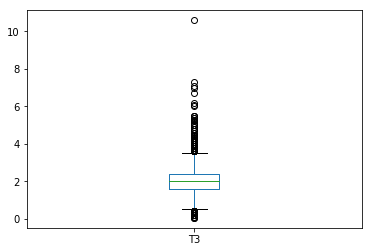

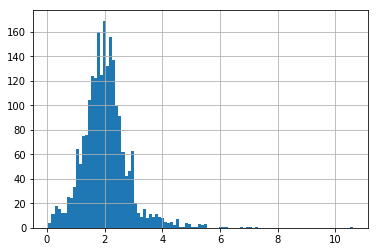

In [22]:
train_data['T3'].plot.box()
plt.figure()
train_data['T3'].hist(bins=100)
plt.figure()


print("Pocet s T3 viac ako 5.5: ", train_data['T3'][train_data['T3'] > 5.5].count())
print("Pocet s T3 viac ako 8: ", train_data['T3'][train_data['T3'] > 8].count())

Na diagrame distribúcie hodnôt TT4 je možné vidieť vzdialený ostrovček dvoch odľahlých hodnôt s veľkosťou cez 400. Vzhľadom na distribúciu TT4 nie je možné jednoznačne prehlásiť, či sa jedná len o posunutú desatinnú čiarku. Odľahlé by mohli byť aj hodnoty nad 280, ktoré vytvárajú dva ostrovčeky. Poupravíme už aj tie, napriek tomu že by mohli byť aj celkom valídne. Sú však len štyry a tak ich prípadné upravenie veľmi nezaváži.

Pocet s TT4 ako 280:  4
Pocet s TT4 ako 400:  2


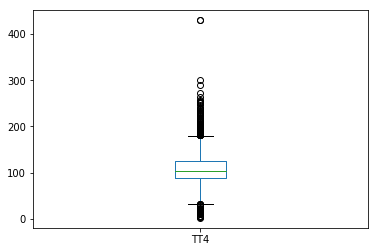

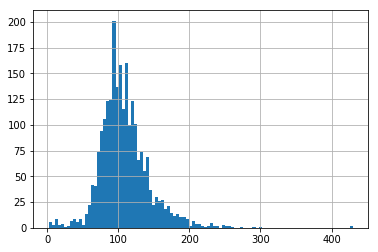

In [23]:
train_data['TT4'].plot.box()
plt.figure()
train_data['TT4'].hist(bins=100)
plt.figure()

print("Pocet s TT4 ako 280: ", train_data['TT4'][train_data['TT4'] > 280].size)
print("Pocet s TT4 ako 400: ", train_data['TT4'][train_data['TT4'] > 400].size)

Pri T4U nie je pravdepodobne prítomná žiadna výrazná chyba.

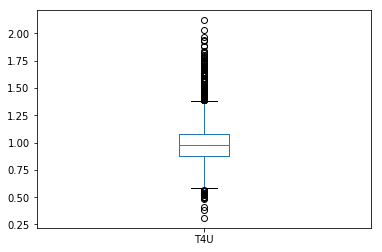

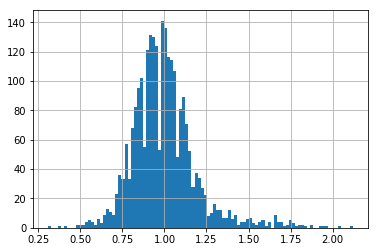

In [24]:
train_data['T4U'].plot.box()
plt.figure()
train_data['T4U'].hist(bins=100)
plt.figure()

Pri atribúte fnlwgt (pravdepodobne značí akúsi váhu) je možné z diagramu bádať tri ostrovčeky potencionálnych odľahlých hodnôt. Tieto tri ostrovčeky eliminujeme (eliminujeme neznamená vymažeme). Otázne je aj to, čoho váhu atribút vyjadruje a v akých jednotkách. Naisto sa ale nejedná o celkovú váhu človeka.

Pocet s fnlwgt viac ako 70000:  7


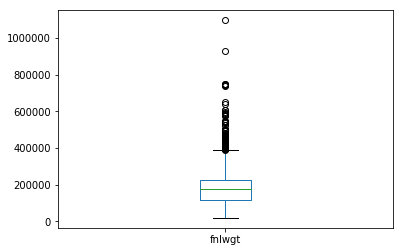

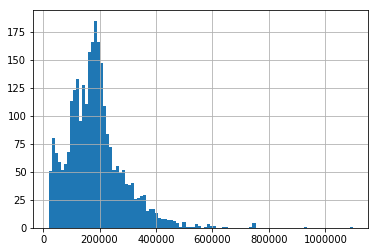

In [25]:
train_data['fnlwgt'].plot.box()
plt.figure()
train_data['fnlwgt'].hist(bins=100)
plt.figure()

print("Pocet s fnlwgt viac ako 70000: ", train_data['fnlwgt'][train_data['fnlwgt'] > 700000].count())

Zdá sa, že education-num je v skutočnosti kategorickým, nie numerickým atribútom. Je dosť možné, že je prepojený s atribútom education.

Pocet unikatnych hodnot education-num:  45
Unikatne hodnoty education-num:  [   11    13    10     9     7    12     8     6   900 -1400     5  -900
  1000     4  1400    14     1 -1000    15  -700 -1300  1200   200   700
 -1200  1500  -600    16  1300     3 -1600  -400 -1100     2   300  1100
   600  -800   400  -300  -500   800  -200 -1500  -100]


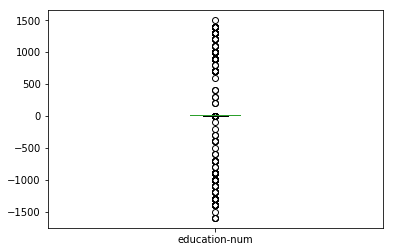

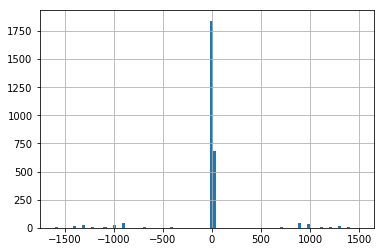

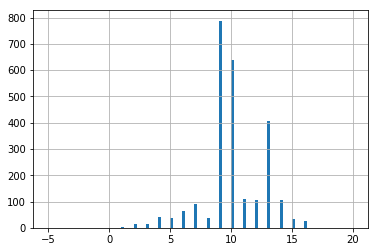

In [26]:
train_data['education-num'].plot.box()
plt.figure()
train_data['education-num'].hist(bins=100)
plt.figure()
train_data['education-num'].hist(bins=100, range=(-5, 20))
plt.figure()
print("Pocet unikatnych hodnot education-num: ", train_data['education-num'].unique().size)
print("Unikatne hodnoty education-num: ", train_data['education-num'].unique())

Distribúcia hodnôt atribútu capital-gain je nanajvýš mätúca. Hodnoty 99999 sú odľahlé, nie je vylúčené, že vyjadrujú neznámosť hodnoty atribútu. Avšak závažná väčšina hodnôt nadobúda nulu a tie nenulové nevykresľujú žiadne znateľné rozdelenie. Ťažko takéto rozdelenie týchto hodnôt interpretovať.

Pocet s capital-gain rovne 0:  2600
Pocet s capital-gain viac ako 0:  200
Pocet s capital-gain rovne 99999:  8


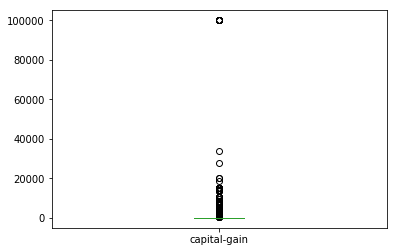

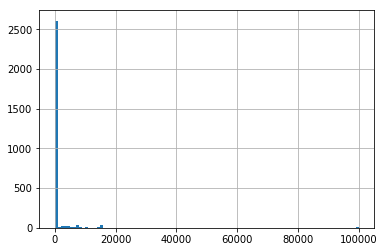

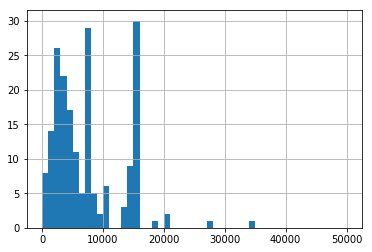

In [27]:
train_data['capital-gain'].plot.box()
plt.figure()
train_data['capital-gain'].hist(bins=100)
plt.figure()
plt.figure()
train_data['capital-gain'].hist(bins=50, range=(1, 50000))
print("Pocet s capital-gain rovne 0: ", train_data['capital-gain'][train_data['capital-gain'] == 0].size)
print("Pocet s capital-gain viac ako 0: ", train_data['capital-gain'][train_data['capital-gain'] > 0].size)
print("Pocet s capital-gain rovne 99999: ", train_data['capital-gain'][train_data['capital-gain'] == 99999].size)


Distribúcia hodnôt capital-loss je rovnako podivná ako pri capital-gain, ibaže hodnôt 0 je ešte viac. Nenulové hodnoty majú snahu vykresľovať sa do normálnej distribúcie, no táto je veľmi rušivá. Vzhľadom na nenulové hodnoty hodnota okolo 3600 odľahlá byť nemusí.

Pocet s capital-loss rovne 0:  2682
Pocet s capital-loss viac ako 0:  118


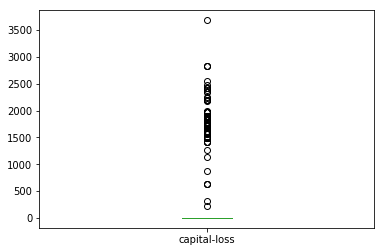

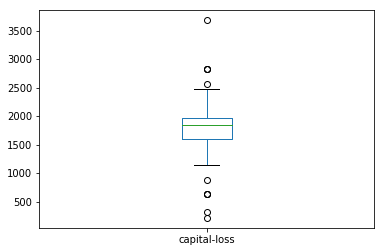

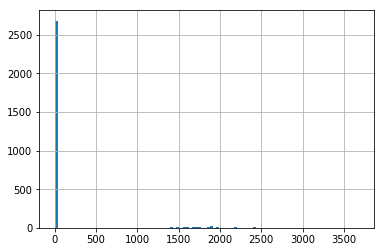

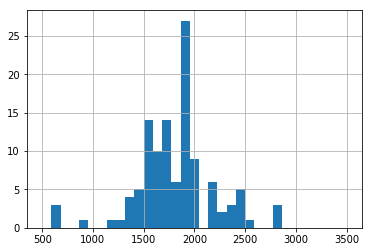

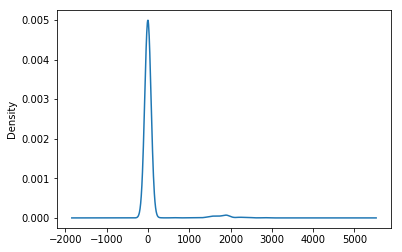

In [28]:
train_data['capital-loss'].plot.box()
plt.figure()
train_data[train_data['capital-loss'] > 0]['capital-loss'].plot.box()
plt.figure()
train_data['capital-loss'].hist(bins=100)
plt.figure()
train_data['capital-loss'].hist(bins=33, range=(500, 3500))
plt.figure()
train_data['capital-loss'].plot(kind="density")
plt.figure()
print("Pocet s capital-loss rovne 0: ", train_data['capital-loss'][train_data['capital-loss'] == 0].size)
print("Pocet s capital-loss viac ako 0: ", train_data['capital-loss'][train_data['capital-loss'] > 0].size)

Dalo by sa predpokladať, že atribúty capital-loss a capital-gain by mali byť istým spôsobom zviazané - počet núl by mal byť rovnaký a po spojení by mali vytvárať spoločne jedno súvislé normálne rozdelenie. Namiesto toho vytvárajú dve oddelené ostročeky. Tieto dáta zdajú sa byť veľmi chybné.

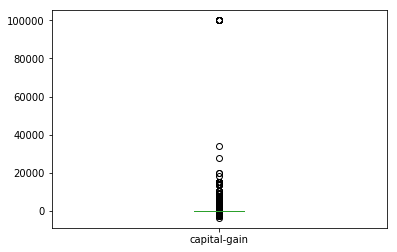

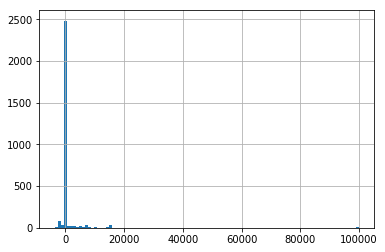

In [29]:
common = train_data
common = train_data['capital-gain']
common += train_data['capital-loss'] * -1
common.plot.box()
plt.figure()
common.hist(bins=100)

Väčšina krajín západného sveta (EU, USA) má nastavený 48 hodiný pracovný limit na týždeň, takže je pomerne otázne, ako boli dáta merané a z kadiaľ pochádzajú. Za vychýlené možno prehlásiť hodnoty nad 68, ktoré sú sústredené v troch ostrovčekoch, i keď ich nameranie nie je nereálne, hoci taká dlhá pracovná doba je na hrane fyzických síl človeka.

Distribúcia odpracovaných hodín sa istým spôsobom pripodobňuje normálnemu rozdeleniu, ale veľmi rušivému, čo je veľmi podivné.

Pocet s hours-per-week viac ako 68:  39
Pocet s hours-per-week viac ako 95:  11


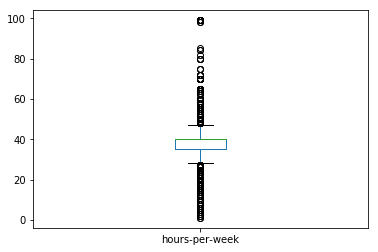

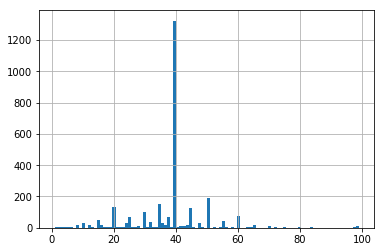

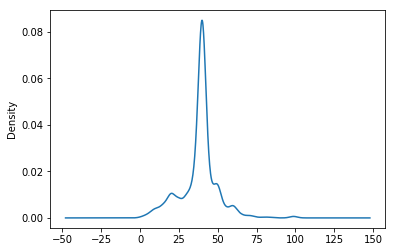

In [30]:
train_data['hours-per-week'].plot.box()
plt.figure()
train_data['hours-per-week'].hist(bins=100)
plt.figure()
train_data['hours-per-week'].plot(kind="density")

print("Pocet s hours-per-week viac ako 68: ", train_data['hours-per-week'][train_data['hours-per-week'] > 68].size)
print("Pocet s hours-per-week viac ako 95: ", train_data['hours-per-week'][train_data['hours-per-week'] > 95].size)

Na boxplote pre FTI možno identifikovať asi 6 ostrovčekov pomerne odľahlých hodnôt s hodnotou viac ako 270. Keďže nepoznáme povahu meraného atribútu, nemusí byť vylúčené, že tieto hodnoty chybné nie sú, predsa ich však vylúčime.

Pocet s FTI ako 270:  7
Pocet s FTI ako 330:  4


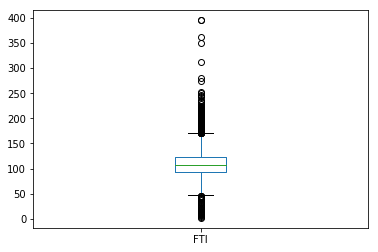

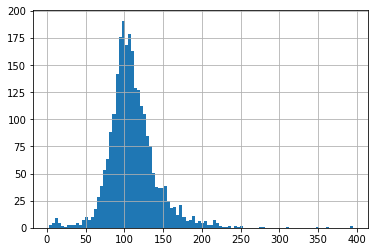

In [31]:
train_data['FTI'].plot.box()
plt.figure()
train_data['FTI'].hist(bins=100)
plt.figure()

print("Pocet s FTI ako 270: ", train_data['FTI'][train_data['FTI'] > 270].size)
print("Pocet s FTI ako 330: ", train_data['FTI'][train_data['FTI'] > 330].size)

## 2.2 Kategorické atribúty

Nechali sme si vypísať desktriptívnu štatistiku pre kategorické atribúty. Už na základe toho sme vypozorovali nasledujúce:

- mnohé atribúty nadobúdajú len dve unikátne hodnoty, pričom u týchto bola najčastejšia hodnota vždy f alebo t, takže sme usúdili, že sa jedná o booleovské atribúty.

- mnohé tieto booleovské atribúty majú tendenciu v drvivej väčšine počte prípadov nadobúdať len jednu z booleovských hodnôt.

- atribút TBG measured nadobúda iba jednú hodnotu vyjadrujúcu, že atribút TBG bol nemeraný, čo je možno súdiť podľa toho, že atribút TBG nadobúda tiež iba jednú hodnotu a to ?, čo je vyjadrením toho istého. Teoreticky bez akéhokoľvek dopadu možno tieto atribúty vylúčiť z dátového súboru, pretože sú pre celý súbor konštatné.

- atribút hypopituitary nadobúda len v jednom prípade hodnotu t. Na základe tejto jednej hodnoty bude teda veľmi obmedzené rozhodovať o pravdivosti tohto atribútu. Nie je to odlišné ako rozhodovať o pravdivosti na základe unikátneho indexu.

In [32]:
train_data.describe(include=['O'])

,on thyroxine,query on thyroxine,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,T3 measured,FTI measured,TBG measured,referral source,workclass,education,marital-status,occupation,relationship,race,native-country,date_of_birth,TSH measured,sex,query hyperthyroid,TT4 measured,on antithyroid medication,sick,T4U measured,psych,query hypothyroid,test,testID
count,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2799,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800
unique,6,2,2,2,2,2,2,2,2,2,2,1,5,14,16,7,26,6,5,38,2721,2,3,2,2,2,2,2,2,2,2,2800
top,f,f,f,f,f,f,f,f,f,t,t,f,other,Private,HS-grad,Never-married,Adm-clerical,Not-in-family,White,United-States,1961-10-23,t,F,f,t,f,f,t,f,f,negative,2365
freq,2223,2760,2759,2761,2752,2786,2775,2729,2799,2215,2505,2800,1632,1774,879,1118,449,899,2318,2493,3,2516,1830,2627,2616,2766,2690,2503,2665,2637,2755,1


Nechali sme si vypísať všetky hodnoty a ich početnosti, ktoré jednotlivé atribúty nadobúdajú. Z tohto sme zistili nasledovné:
- atribút "on thyroxine" je očividne booleovský, predsa však nadobúda až 6 hodnôt, pretože jednotlivé booleovské hodnoty sú v ňom vyjadrené rozličnými symbolmi.

- podobný problém sa vyskytuje aj u atribútu workclass, kde sú hodnoty líšiace sa len medzerou na začiatku slova a veľkosťou prvého písmená považované za odlišné.

- niektoré názvy krajín zdajú sa byť ukrojené - South, či Hong. Môže ísť o Južnú Afriku a o Hong-Kong, môže to však byť aj preklep.

In [33]:
for column in train_data.columns[train_data.dtypes == np.object]:
    if train_data[column].unique().size < 50:
        print(train_data[column].value_counts())
        print()

f        2223
t         297
F         126
FALSE     121
TRUE       19
T          14
Name: on thyroxine, dtype: int64

f    2760
t      40
Name: query on thyroxine, dtype: int64

f    2759
t      41
Name: pregnant, dtype: int64

f    2761
t      39
Name: thyroid surgery, dtype: int64

f    2752
t      48
Name: I131 treatment, dtype: int64

f    2786
t      14
Name: lithium, dtype: int64

f    2775
t      25
Name: goitre, dtype: int64

f    2729
t      71
Name: tumor, dtype: int64

f    2799
t       1
Name: hypopituitary, dtype: int64

t    2215
f     585
Name: T3 measured, dtype: int64

t    2505
f     295
Name: FTI measured, dtype: int64

f    2800
Name: TBG measured, dtype: int64

other    1632
SVI       771
SVHC      275
STMW       91
SVHD       31
Name: referral source, dtype: int64

 Private             1774
private               200
 Local-gov            192
 Self-emp-not-inc     160
 ?                    152
 State-gov            113
 Federal-gov           68
 Self-emp-inc       

Početnosti kategorických atribútov sme si nechali aj vizualizovať.

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


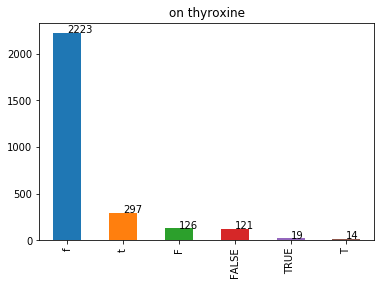

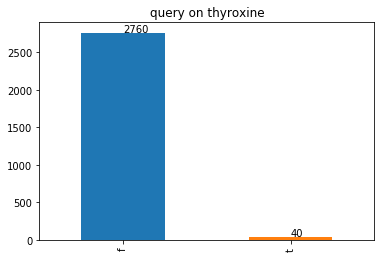

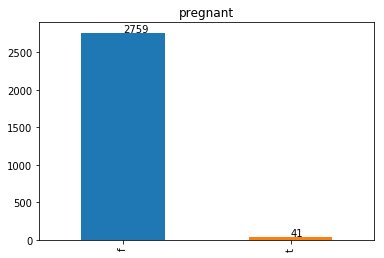

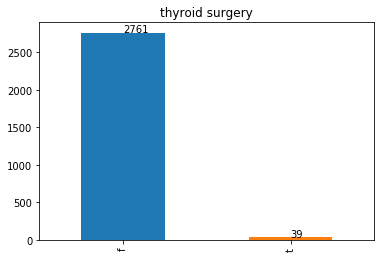

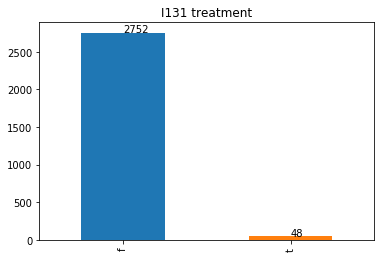

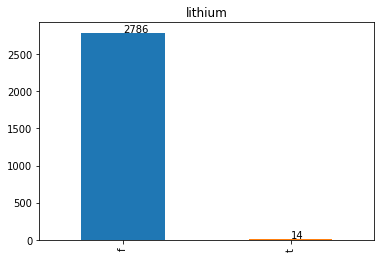

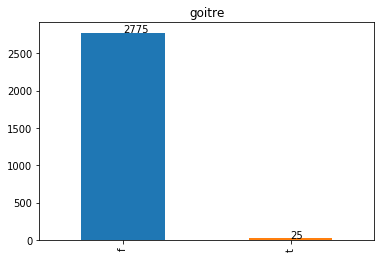

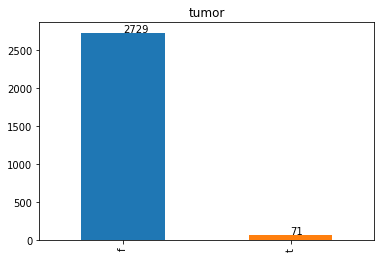

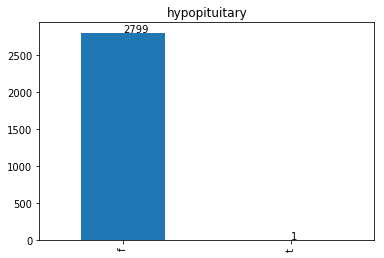

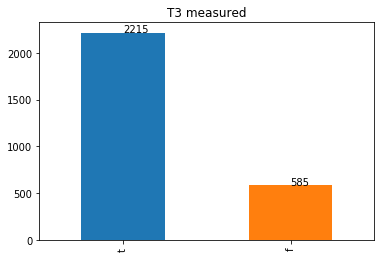

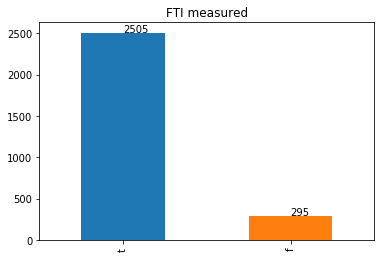

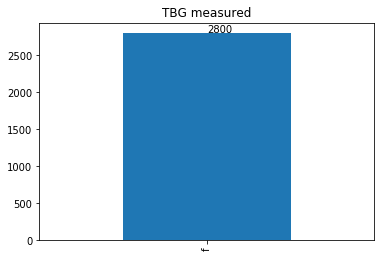

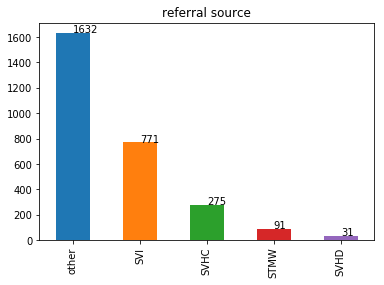

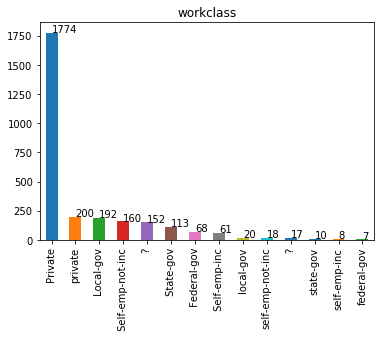

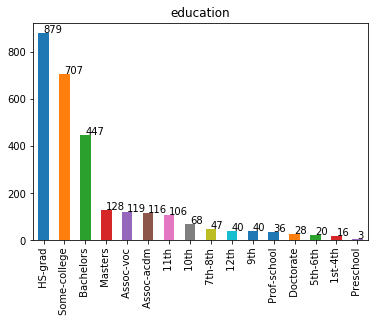

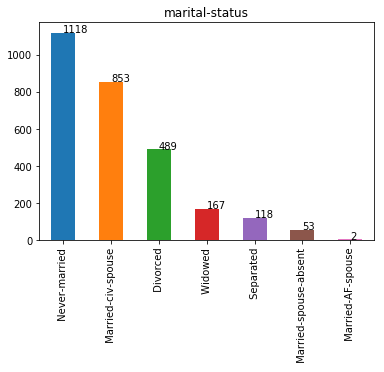

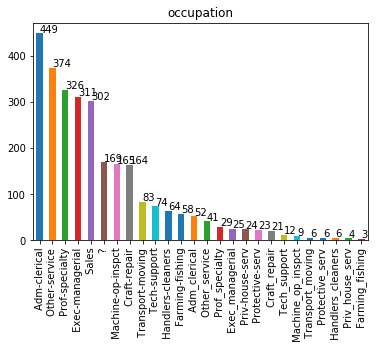

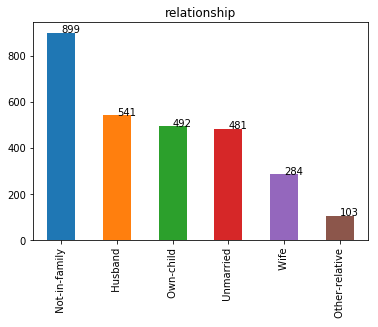

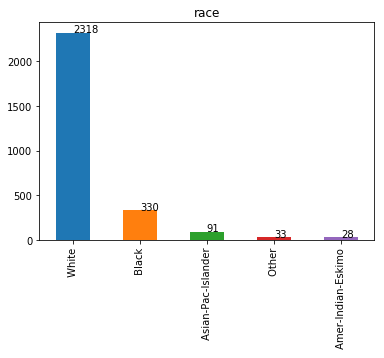

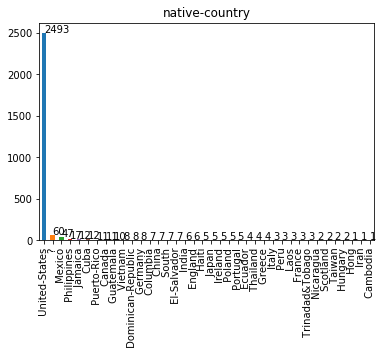

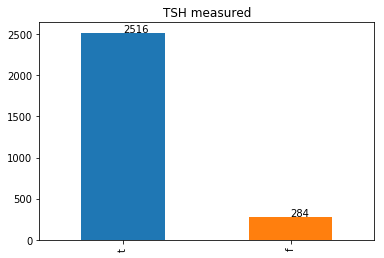

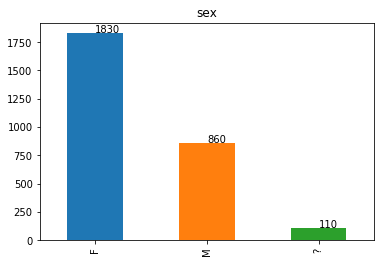

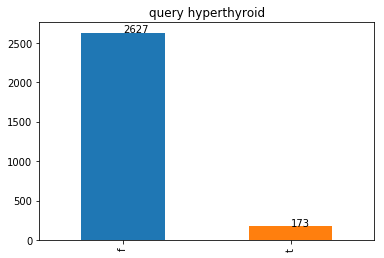

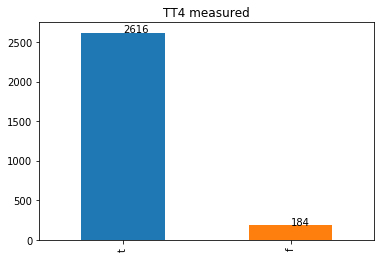

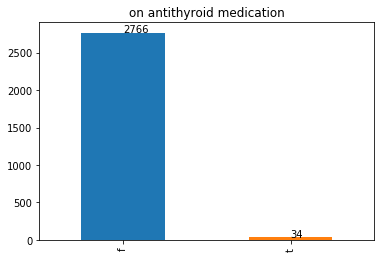

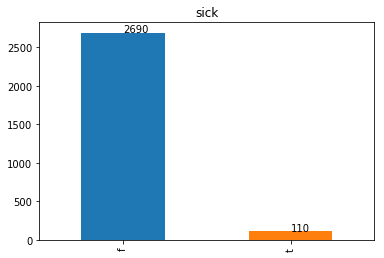

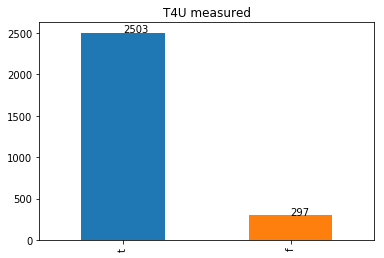

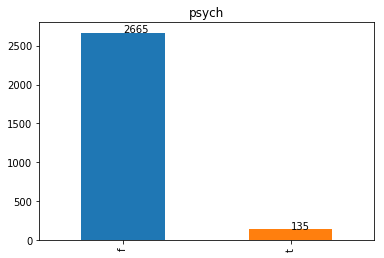

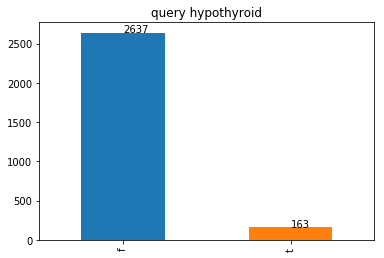

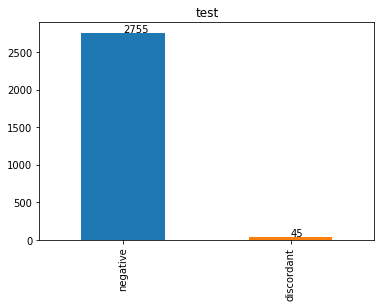

In [34]:
for column in train_data.columns[train_data.dtypes == np.object]:
    if train_data[column].unique().size < 50:
        for i in range(train_data[column].unique().size):
            plt.text(i, train_data[column].value_counts()[i] + 2, str(train_data[column].value_counts()[i]))
        train_data[column].value_counts().plot(kind='bar', title=column)
        plt.figure()

## 3 Analýza dvojíc atribútov
V tejto časti sa snažíme predovšetkým vyhľadávať možné väzby (korelácie, závislosti) medzi dvojicami atribútov.

## 3.1 Kategorické-kategorické atribúty

Kedže možnosti kombinácii kategorických atribútov bolo veľké množstvo, ktoré nebolo v našich časových možnostiach pokryť, rozhodli sme sa napísať algoritmus, ktorý by hľadal len také, ktoré sa môžu navzájom ovplyvňovať.

Tento algoritmus vyhľadáva také kombinácie hodnôt kategorických atribútov, kedy zmena jedného upraví pravdepodobnosť výskytu hodnoty druhého - to naznačuje, že môže medzi nimi existovať istý vzťah. Zároveň však pomocou výpočtu korelácie medzi jednotlivými riadkami vylučuje také kombinácie, kedy zmena istej hodnoty prvého atribútu nezmení pre danú prvú hodnotu rozdelenie výskytu pravdepodobností hodnôt druhého atribútu, alebo lepšie povedané túto distribpciu neotočí. Algoritmus tým samozrejme vynecháva čiastočné závislosti medzi atribútmi, bohožiaľ však týchto bolo nemálo a jednak nám na ich analýzu nám nevystačil čas, pričom ich signifikantnosť by beztak ostávala diskutabilná.

Na nižšie uvedených diagramoch je vidieť niektoré potencionálne prepojené atribúty.

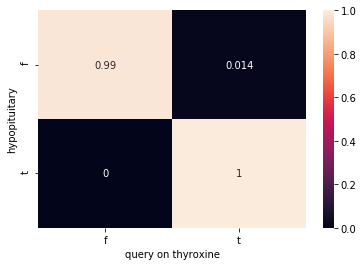

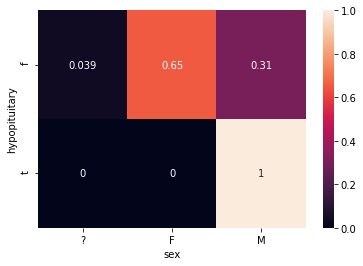

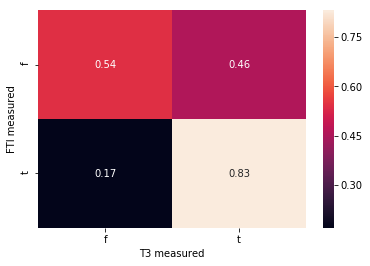

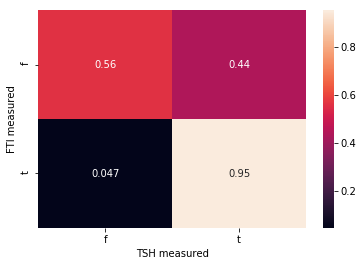

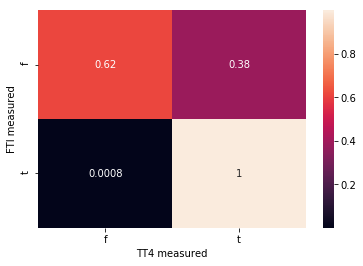

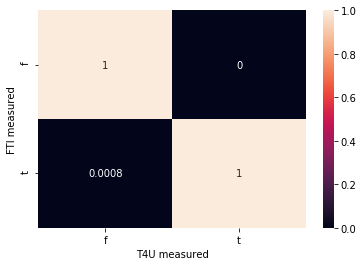

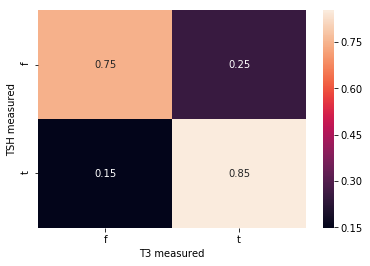

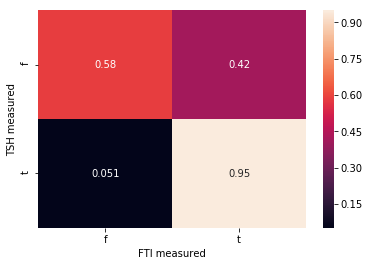

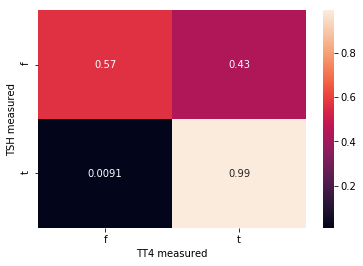

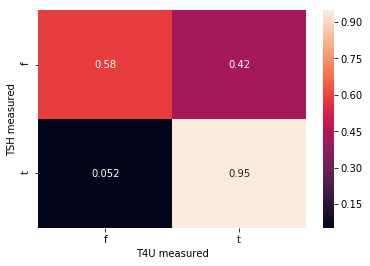

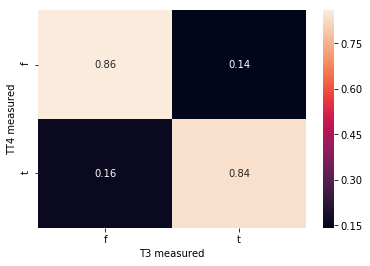

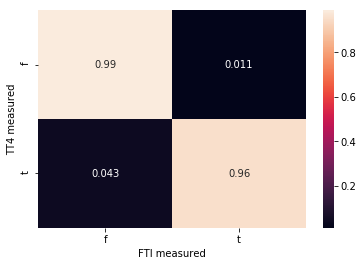

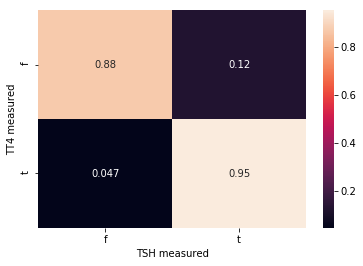

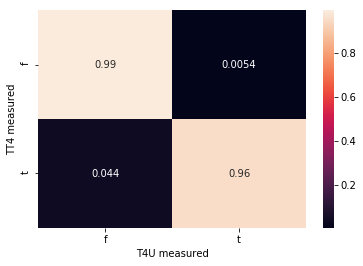

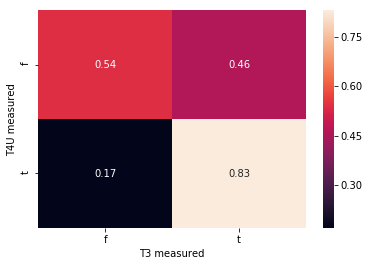

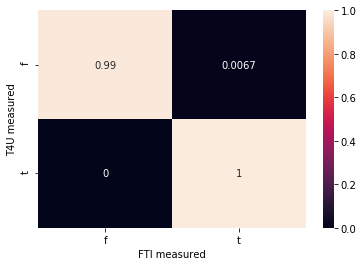

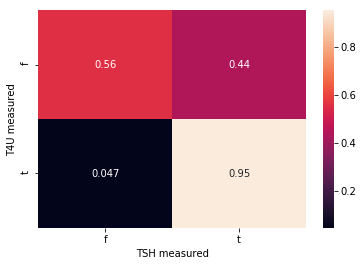

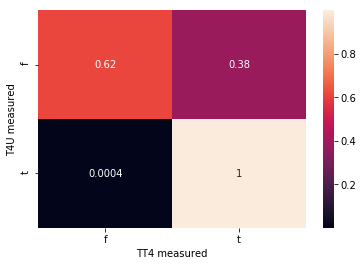

In [35]:
for column in train_data.columns[train_data.dtypes == np.object]:
    for column2 in train_data.columns[train_data.dtypes == np.object]:
        if train_data[column].unique().size < 4 and train_data[column2].unique().size < 4 and column != column2:
            ctab = pd.crosstab(index=train_data[column], columns=train_data[column2], normalize='index')
            non_uniform = False
            for col in ctab.columns:
                diffs = [(ctab[col][a] - ctab[col][b]) for a in range(ctab.shape[0]) for b in range(a+1, ctab.shape[0])]
                for d in diffs:                        
                    if abs(d) > (1 / ctab.shape[1] / 3):
                        non_uniform = True
                        break
                if non_uniform:
                    break
                    
            if non_uniform:
                corrs = [(ctab.iloc[a].corr(ctab.iloc[b])) for a in range(ctab.shape[0]) for b in range(a+1, ctab.shape[0])]
                for c  in corrs:
                    if c <= 0.2:
                        seaborn.heatmap(ctab, annot=True)
                        plt.figure()
                        break
                        

Tie najvýznamenejšie zistenia týkajúce sa prepojenosti kategorických atribútov sa týkajú booleovských atribútov označujúcich nameranie jednotlivých medicínskych meraní, ktoré boli veľmi tesne späté - t.j. keď sa vykonalo jedno, bola vysoká pravdepodobnosť vykonania iného. Úplne prepojené boli FTI a T4U, takmer úplná spätosť bola u T4U a FTI, stále ešte veľmi značná bola aj medzi TT4 a T3, TT4 a FTI, TT4 a TSH, TT4 a T4U. Ak by sa jednalo o spojité atribúty dalo by sa vravieť, že spolu veľmi výrazne korelujú. 

Zisťovania prepojenosti kategorických atribútov nadobúdajúcich viac ako 2 či 3 hodnoty je vizuálne veľmi komplikované a tak síce uvedieme diagramy možných zaujímavých kombinácií, no interpretácii, ktorá je priamočiara sa zdržíme.

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


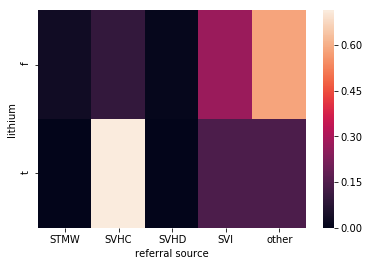

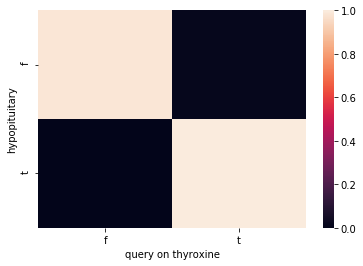

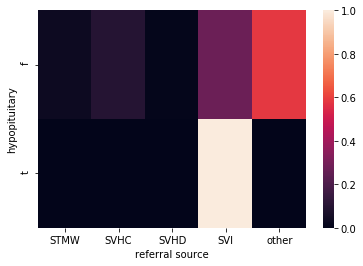

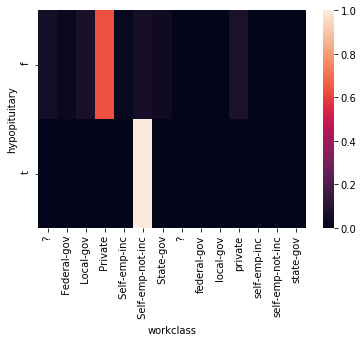

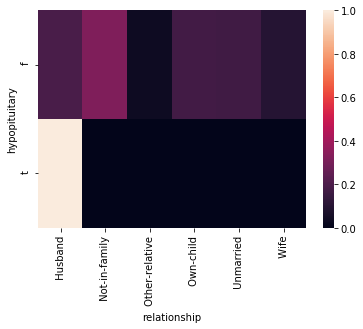

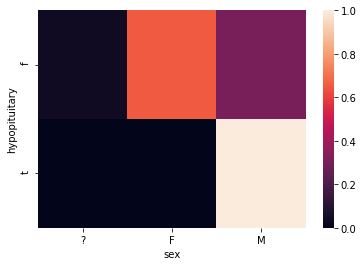

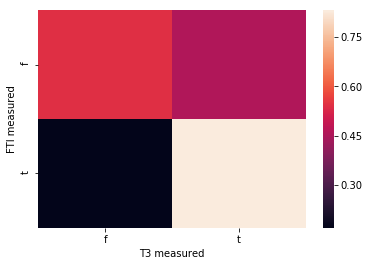

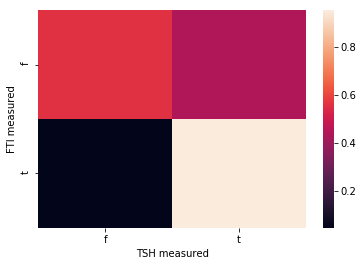

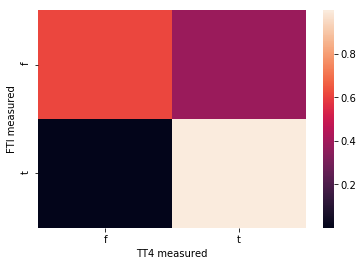

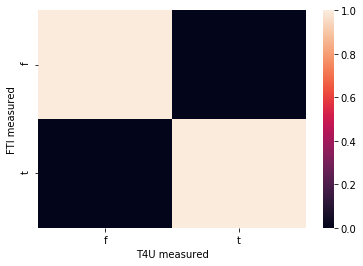

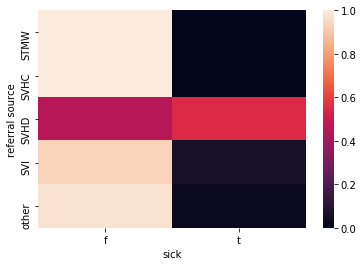

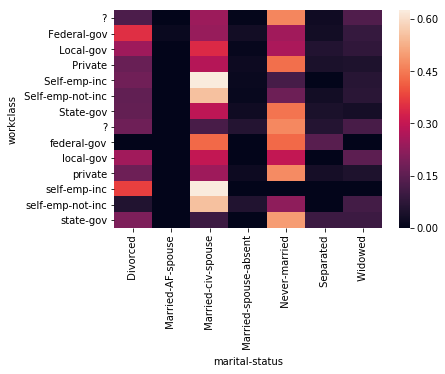

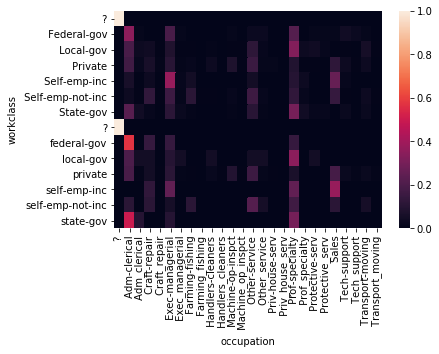

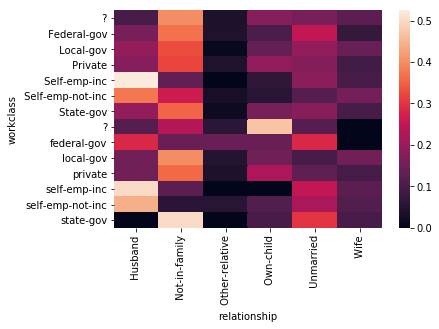

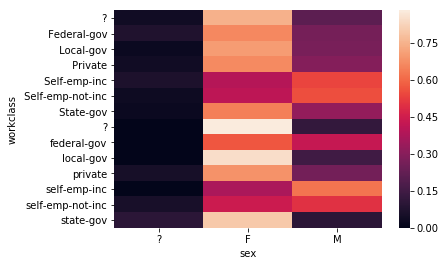

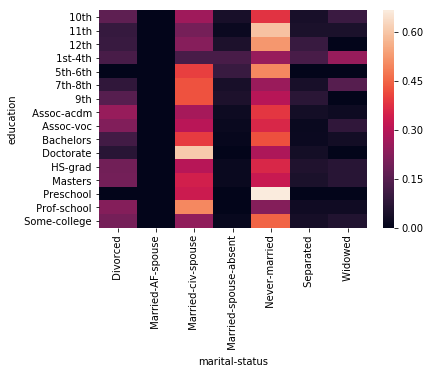

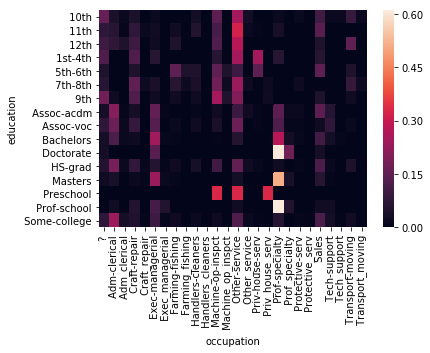

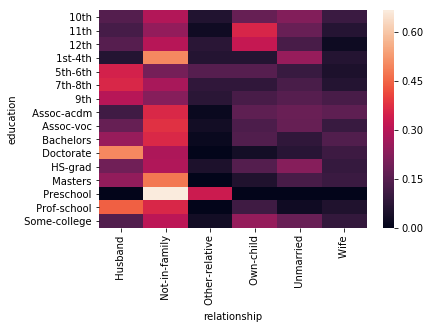

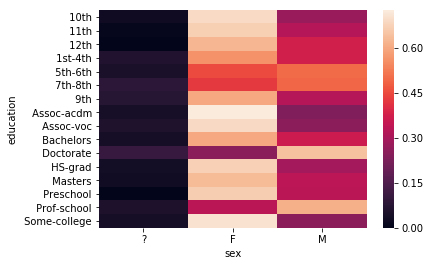

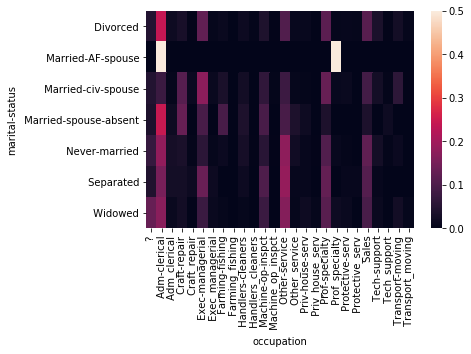

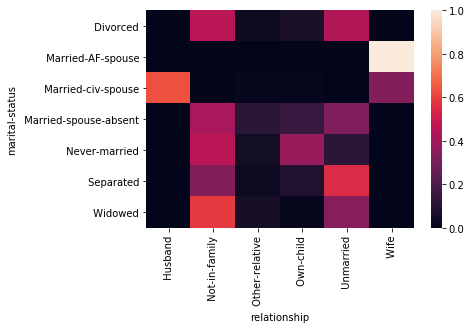

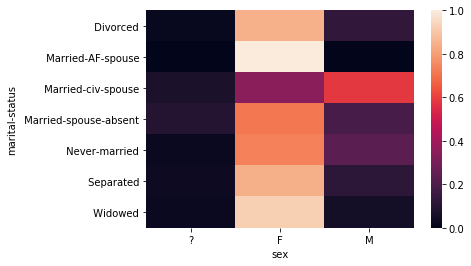

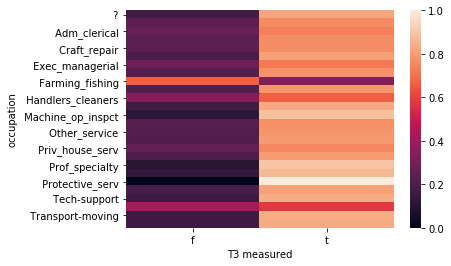

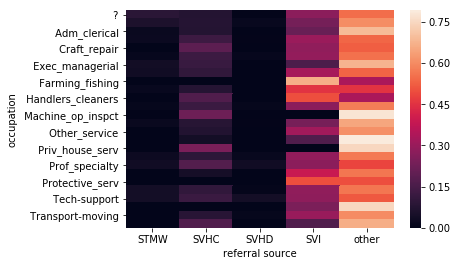

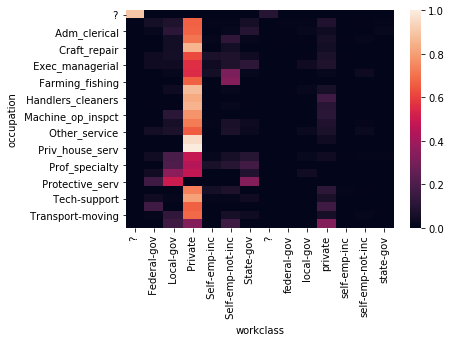

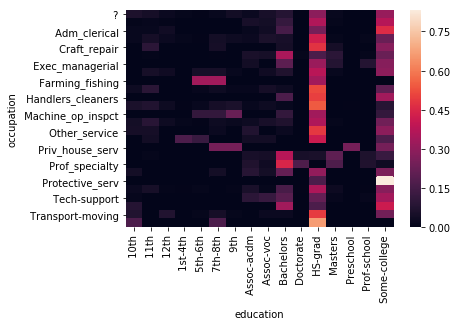

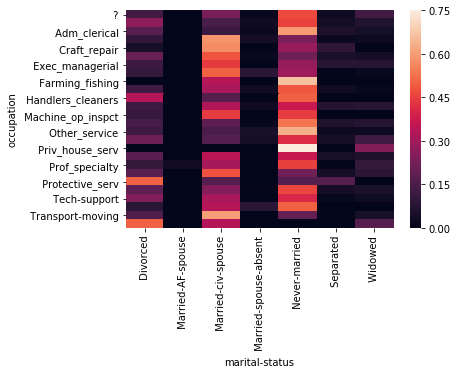

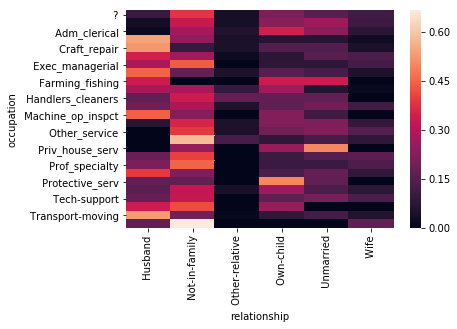

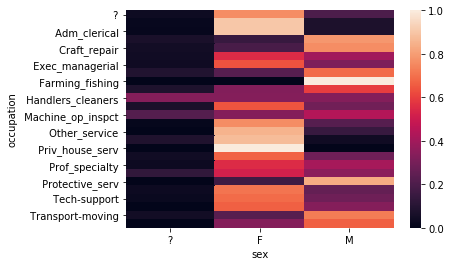

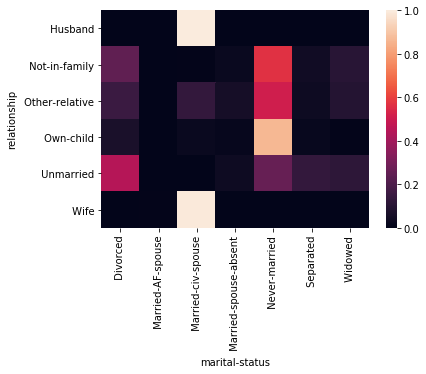

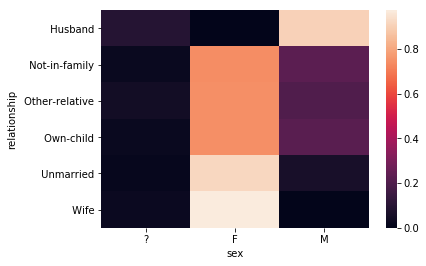

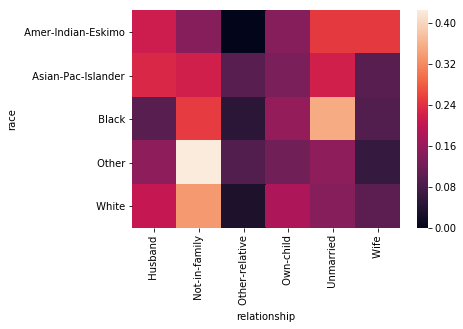

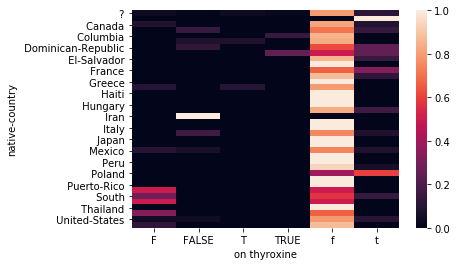

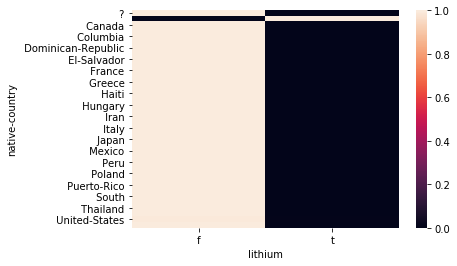

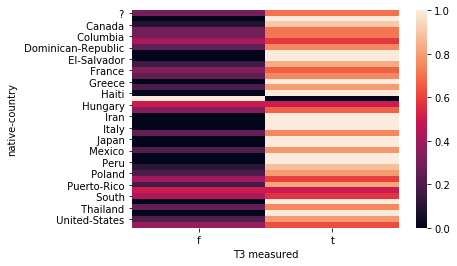

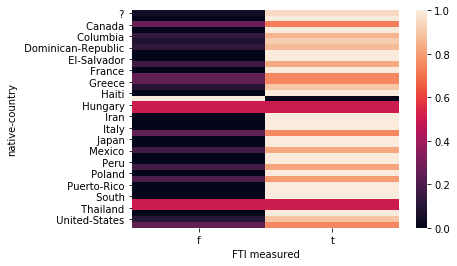

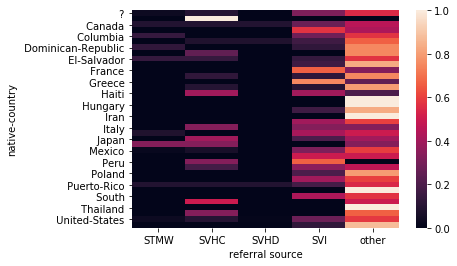

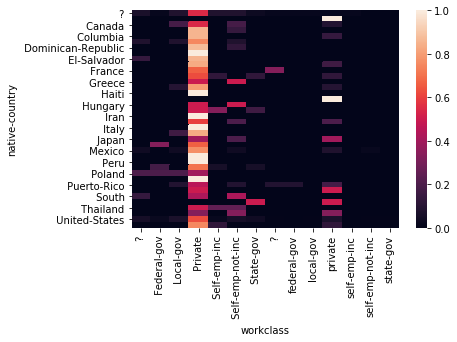

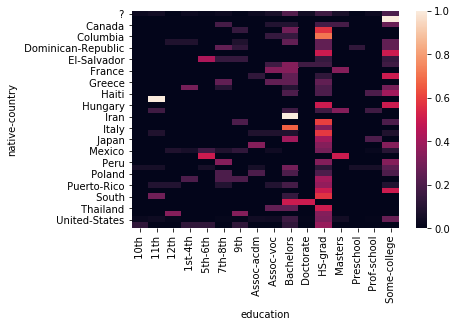

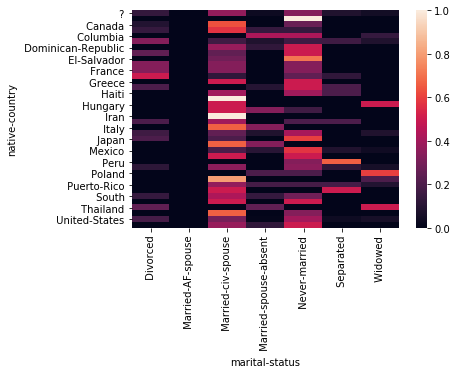

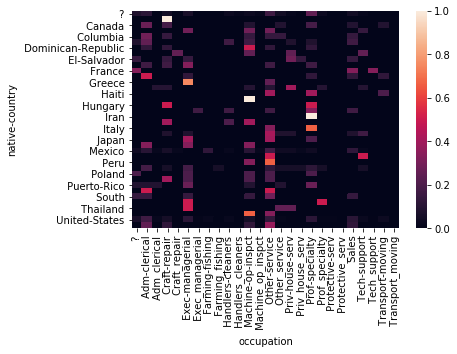

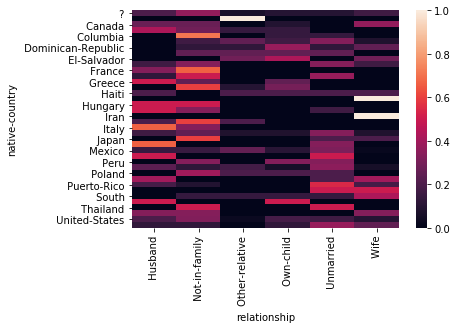

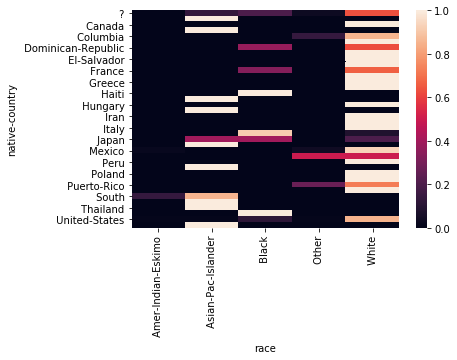

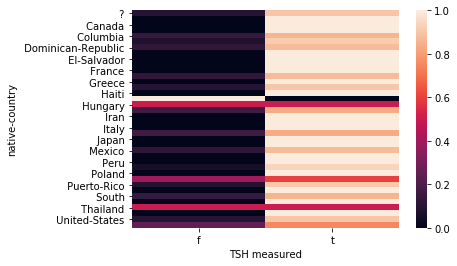

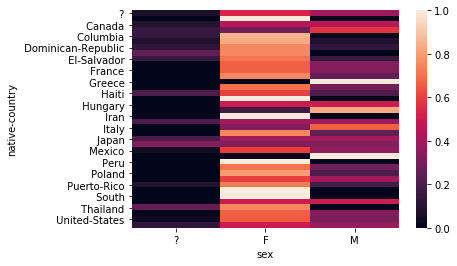

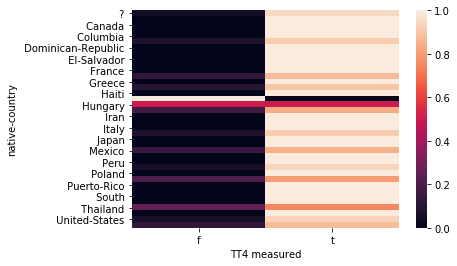

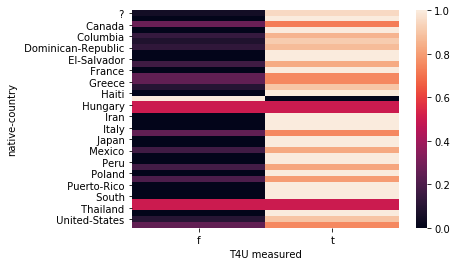

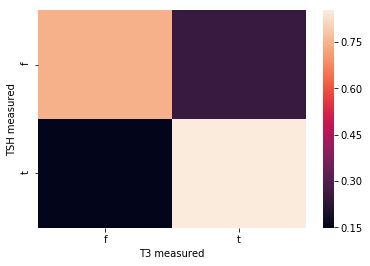

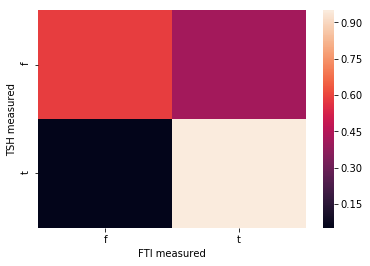

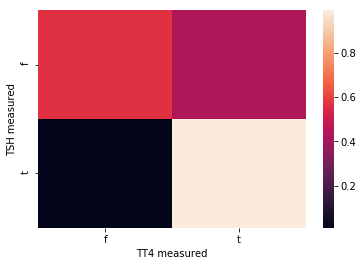

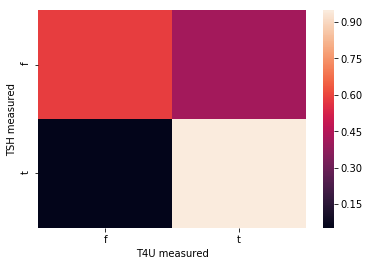

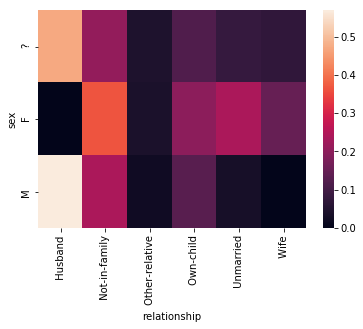

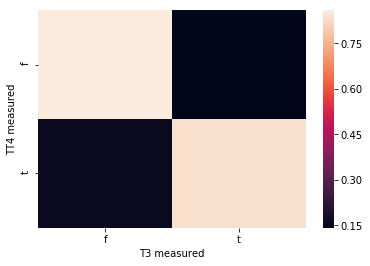

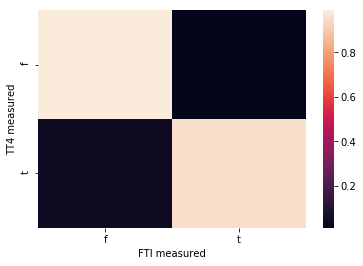

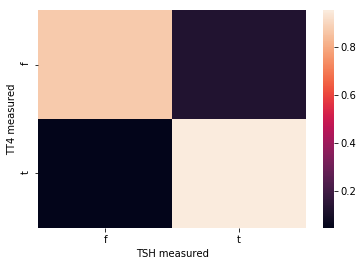

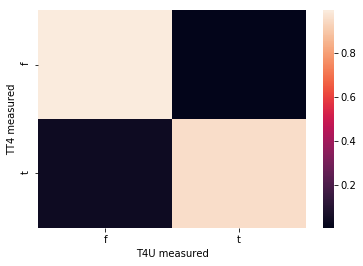

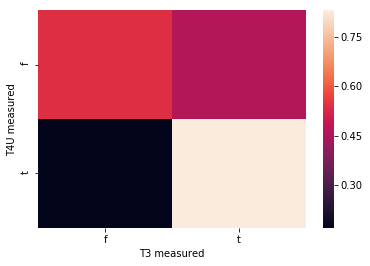

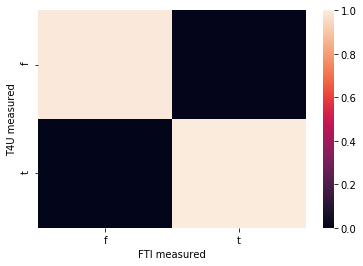

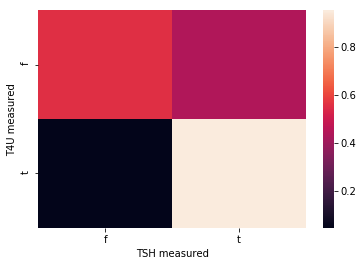

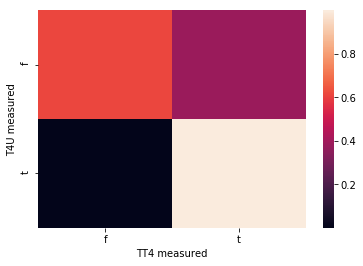

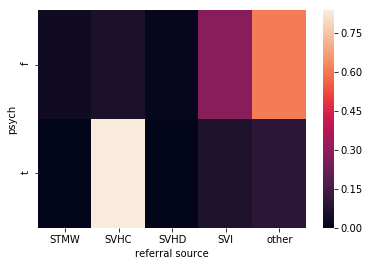

In [36]:
for column in train_data.columns[train_data.dtypes == np.object]:
    for column2 in train_data.columns[train_data.dtypes == np.object]:
        if train_data[column].unique().size < 50 and train_data[column2].unique().size < 50 and column != column2:
            ctab = pd.crosstab(index=train_data[column], columns=train_data[column2], normalize='index')
            non_uniform = False
            for col in ctab.columns:
                diffs = [(ctab[col][a] - ctab[col][b]) for a in range(ctab.shape[0]) for b in range(a+1, ctab.shape[0])]
                for d in diffs:                        
                    if abs(d) > (1 / ctab.shape[1] / 3):
                        non_uniform = True
                        break
                if non_uniform:
                    break
                    
            if non_uniform:
                corrs = [(ctab.iloc[a].corr(ctab.iloc[b])) for a in range(ctab.shape[0]) for b in range(a+1, ctab.shape[0])]
                for c  in corrs:
                    if c <= 0.2:
                        seaborn.heatmap(ctab)
                        plt.figure()
                        break
                        

Nižšie uvedený diagram demoštruje správnosť domienky, že education a education-num sú prepojené. Je vidieť, že oba vyjadrujú to isté, ibaže atribút education-num je chybne zaradený medzi číselné atribúty a k tomu má ešte rôzne rôzne hodnoty vyjadrujúce ten istý poznatok. Jeden z dvojice atribútov education a education-num možno vylúčiť bez dosahu na výsledok.

(education-num je stále považovaný za číselný atribút, preto nemožno nájsť jeho výskyt vo vyššie uvedených tabuľkách analýzy kategorických-kategorických atribútov)

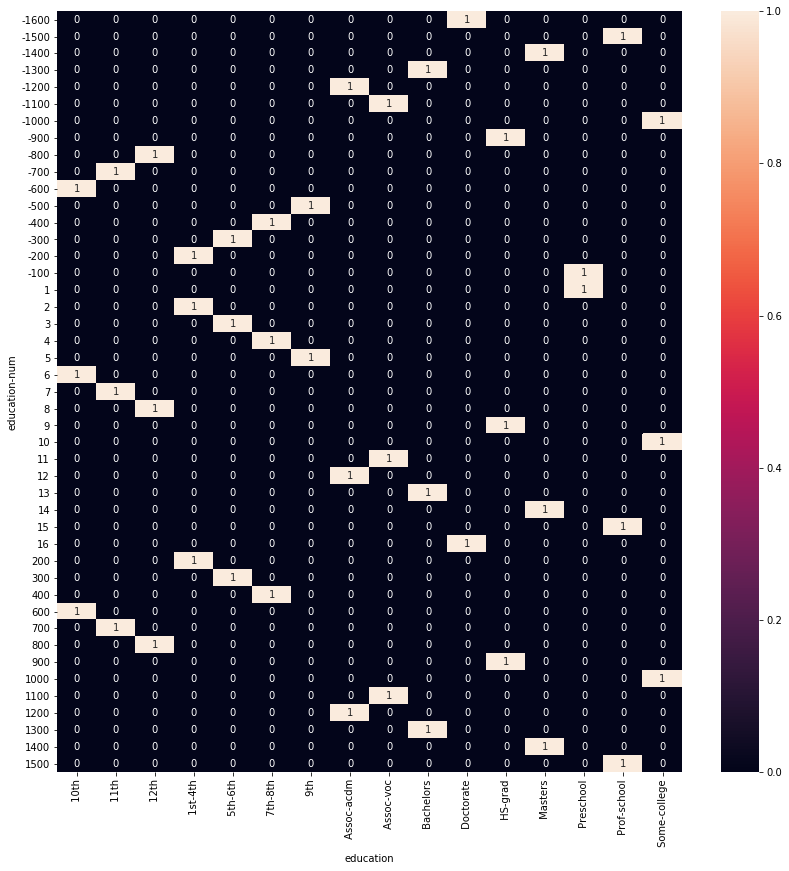

In [37]:
fig, ax = plt.subplots(figsize=(14, 14))
seaborn.heatmap(pd.crosstab(index=train_data['education-num'], columns=train_data['education'], normalize='index'), ax=ax, annot=True)

### 3.2 Spojité-kategorické atribúty

Na začiatok sme si overili, či náš úsudok o tom, že booleovské "measured" atribúty skutočne vyjadrujú, či boli odpovedajúco nazvané medicínske merania vykonané. Ukázalo sa, že pri TT4 to neplatí. Zrejmou možnosťou, ktorá sa naskytuje ako vyriešiť danú situáciu je jednoducho opraviť booleovské hodnoty záznamov v stĺpci TT4 measured podľa hodnôt v stĺpci TT4.


In [38]:
print("Nezhodnych TSH: ", train_data['TSH measured'][train_data['TSH measured'] == 't'][train_data['TSH'].isnull()].shape[0] +  train_data['TSH measured'][train_data['TSH measured'] == 'f'][train_data['TSH'].notnull()].shape[0])
print("Nezhodnych T3: ", train_data['TT4 measured'][train_data['T3 measured'] == 't'][train_data['T3'].isnull()].shape[0] +  train_data['T3 measured'][train_data['T3 measured'] == 'f'][train_data['T3'].notnull()].shape[0])
print("Nezhodnych FTI: ", train_data['FTI measured'][train_data['FTI measured'] == 't'][train_data['FTI'].isnull()].shape[0] +  train_data['FTI measured'][train_data['FTI measured'] == 'f'][train_data['FTI'].notnull()].shape[0])
print("Nezhodnych T4U: ", train_data['T4U measured'][train_data['T4U measured'] == 't'][train_data['T4U'].isnull()].shape[0] +  train_data['T4U measured'][train_data['T4U measured'] == 'f'][train_data['T4U'].notnull()].shape[0])
print("Nezhodnych TT4: ", train_data['TT4 measured'][train_data['TT4 measured'] == 't'][train_data['TT4'].isnull()].shape[0] +  train_data['TT4 measured'][train_data['TT4 measured'] == 'f'][train_data['TT4'].notnull()].shape[0])

Nezhodnych TSH:  0
Nezhodnych T3:  0
Nezhodnych FTI:  0
Nezhodnych T4U:  0
Nezhodnych TT4:  264


Na vytriedenie nezaujímavých kombinácií atribútov - teda takých, ktoré sa očividne navzájom neovplyvňujú - sme použili následovný algoritmus:

Pracuje približne rovnako, ako by sme my ich hľadali mi, teda vylučujé také kombinácie, keď zmena hodnoty kategorického atribútu neovyplvňuje danú štatistickú hodnotu (priemer, medián) druhého atribútu. Robí to na základe výpočtu odchýlky v priemeroch/mediánoch zgrupovaných podľa hodnôt daného kategorického atribútu a jej relatívneho pomerania s priemernou hodnotou, ktoré zgrupované priemery/mediány spoločne dosahujú. Ak je odchýľka dostatočne veľká, daná kombinácia spojitého a kategorického atribútu stojí za pozornosť.

Uvažovali sme, že neodstránení outliery môžu spôsobiť isté výkyvy, preto sme v prípadoch, keď rozptyl hodnôt bol pomerne veľký použili namiesto priemeru medián.

I napriek rozloženiu rovnakého významu do viacerých hodnôt atribútu "on thyroxine" možno vidieť, že ak pozorovaný subjekt nebol na tyroxíne, mal v mediáne znateľne vyššie TSH.

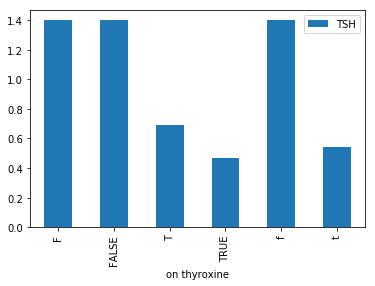

In [39]:
train_data.groupby('on thyroxine').median()[['TSH']].plot(kind='bar', stacked=True)

Subjetky s dopytom po tyroxíne mali v mediáne znížneé TSH ako bez dopytu a to na hladinu približne jednej sedminy. 

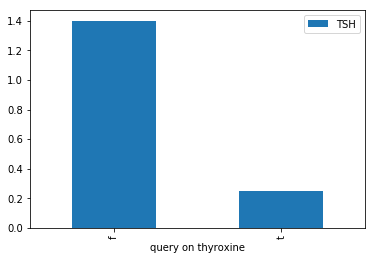

In [5]:
train_data.groupby('query on thyroxine').median()[['TSH']].plot(kind='bar', stacked=True)

Tehotné ženy mali v priemere približne o 18 rokov nižší vek ako netehotné.

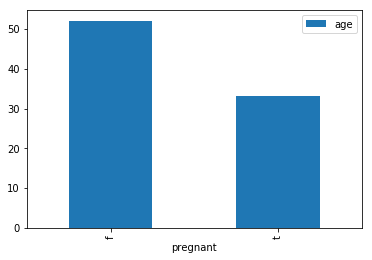

In [41]:
train_data.groupby('pregnant').mean()[['age']].plot(kind='bar', stacked=True)

Tehotenstvo malo zdanlivo na TSH taký vplyv, že ho v mediáne veľmi badateľne znižovalo na sedminu.

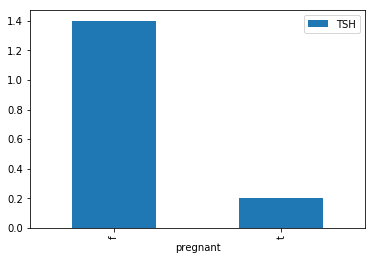

In [42]:
train_data.groupby('pregnant').median()[['TSH']].plot(kind='bar', stacked=True)

Tehotenstvo však zvyšovalo v priemere hladinu T3 o polovicu.

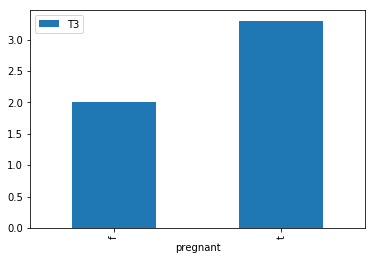

In [43]:
train_data.groupby('pregnant').mean()[['T3']].plot(kind='bar', stacked=True)

A rovnako tehotenstvo zvyšovalo v priemere aj hladinu T4U o niečo viac ako o polovicu.

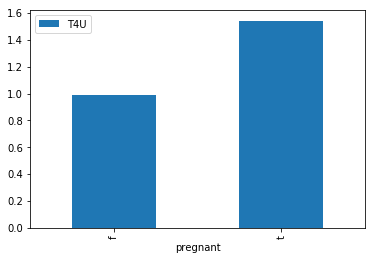

In [44]:
train_data.groupby('pregnant').mean()[['T4U']].plot(kind='bar', stacked=True)

TT4 stúplo u tehotných rovnakým podielom ako T4U.

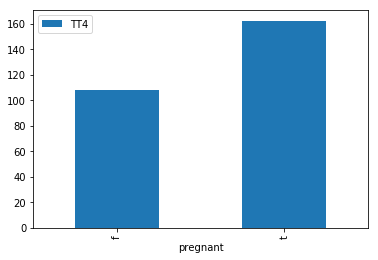

In [45]:
train_data.groupby('pregnant').mean()[['TT4']].plot(kind='bar', stacked=True)

Subjekty s lítiom mali TSH v mediáne vyššie ako subjetky bez neho, približne o tretinu.

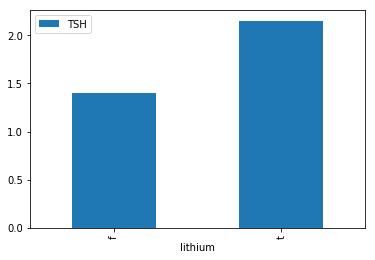

In [46]:
train_data.groupby('lithium').median()[['TSH']].plot(kind='bar', stacked=True)

Subjekty so strumou mali v mediáne o takmer polovicu nižšie TSH ako subjekty bez.

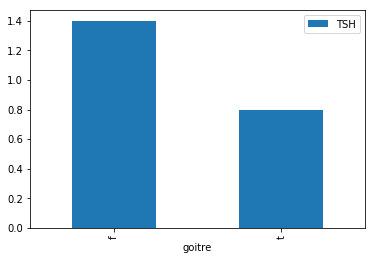

In [47]:
train_data.groupby('goitre').median()[['TSH']].plot(kind='bar', stacked=True)

Podobne subjekty s tumorom mali v mediáne o viac ako polovicu nižšie TSH ako subjekty bez.

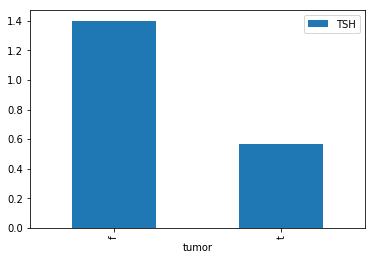

In [48]:
train_data.groupby('tumor').median()[['TSH']].plot(kind='bar', stacked=True)

A subjekty s tumorom mali v priemere aj nepatrne zvyšené meranie T3, cca. o štvrtinu.

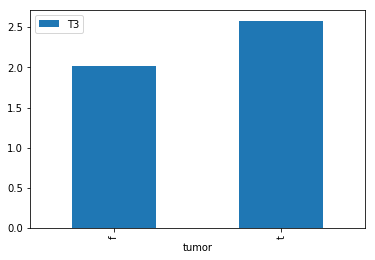

In [49]:
train_data.groupby('tumor').mean()[['T3']].plot(kind='bar', stacked=True)

Subjekt s hypopituitary mal približne 20 rokov.

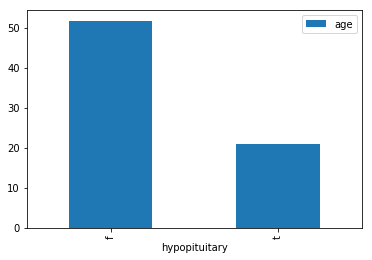

In [50]:
train_data.groupby('hypopituitary').mean()[['age']].plot(kind='bar', stacked=True)

Subjekt s hypopituitary mal znížnené TSH na jednu sedminu.

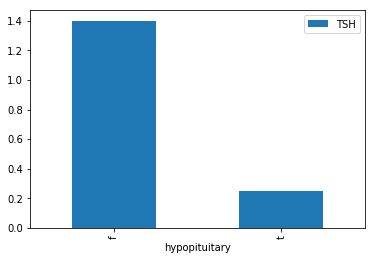

In [51]:
train_data.groupby('hypopituitary').median()[['TSH']].plot(kind='bar', stacked=True)

Subjekt s hypopituitary mal znížnené T3 približne o 37 percent.

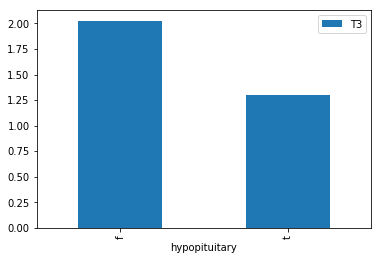

In [52]:
train_data.groupby('hypopituitary').mean()[['T3']].plot(kind='bar', stacked=True)

Subjekt s hypopituitary mal education-num 13.

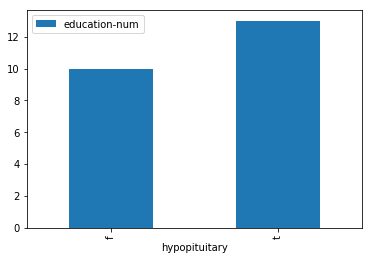

In [53]:
train_data.groupby('hypopituitary').median()[['education-num']].plot(kind='bar', stacked=True)

Subjekt s hypopituitary mal FTI znížené približne o 60 percent.

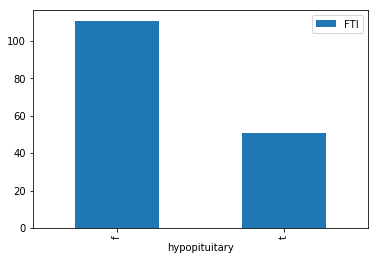

In [54]:
train_data.groupby('hypopituitary').mean()[['FTI']].plot(kind='bar', stacked=True)

Rovnakým podielom ako FTI mal subjekt s hypopituitary znížené aj TT4.

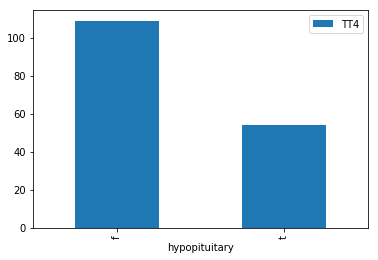

In [55]:
train_data.groupby('hypopituitary').mean()[['TT4']].plot(kind='bar', stacked=True)

Subjekty s nameraným FTI mali v mediáne nižšie TSH, približne o tretinu.

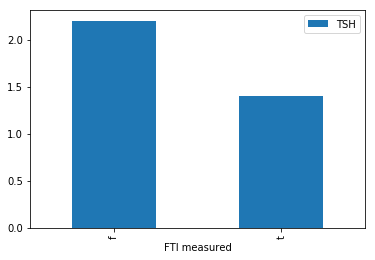

In [56]:
train_data.groupby('FTI measured').median()[['TSH']].plot(kind='bar', stacked=True)

Zdroje SVI a SVHD čerpali dáta v priemere z najstarších, približne 60 ročných subjektov. STMW malo subjekty v priemere najmladšie, 30 ročné.

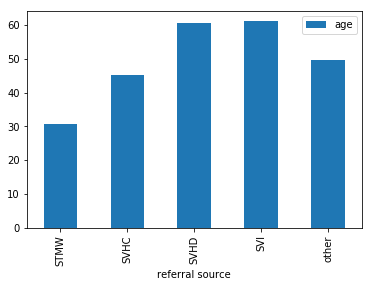

In [57]:
train_data.groupby('referral source').mean()[['age']].plot(kind='bar', stacked=True)

Zdroj STMW mal niektoré pozorovania vychýlenejšie. Toto môže byť v dôsledku nižšieho veku subjektov zo zdroja STMW.

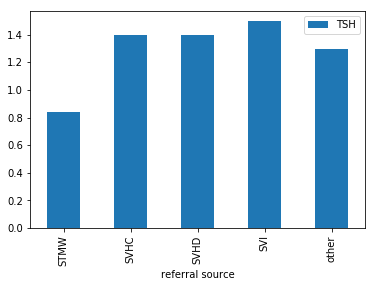

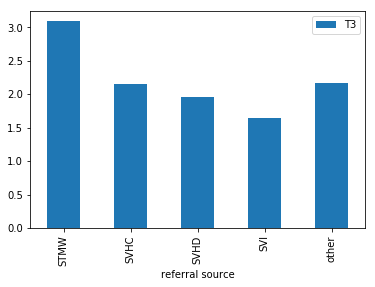

In [58]:
train_data.groupby('referral source').median()[['TSH']].plot(kind='bar', stacked=True)
train_data.groupby('referral source').mean()[['T3']].plot(kind='bar', stacked=True)

Aj v prípade niektorých hodnôt atribútov vyjadrujúcich spoločenské postavenie bolo TSH v mediáne pomerne variantné, avšak ťažko hovoriť o priamej súvislosti, či nebodaj príčinnosti spoločenského postavenia s výškou TSH. Náhodnosť, alebo nepriama súvislosť je pravdepodobnejšia (teda nejaký atribút, od ktorého je TSH závislé je nerovnomerne rozdelený medzi hodnotami atribútov vyjadrujúcich spoločenské postavenie).

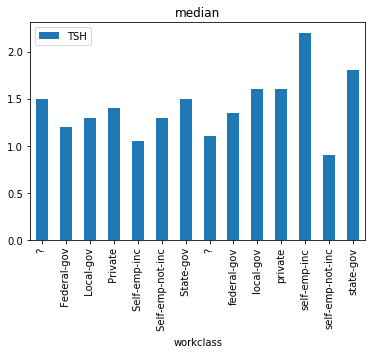

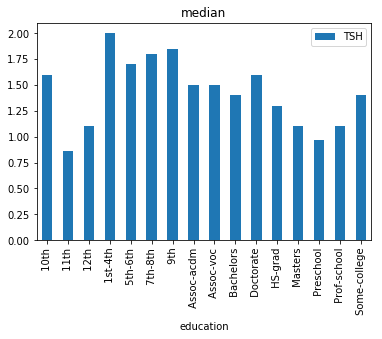

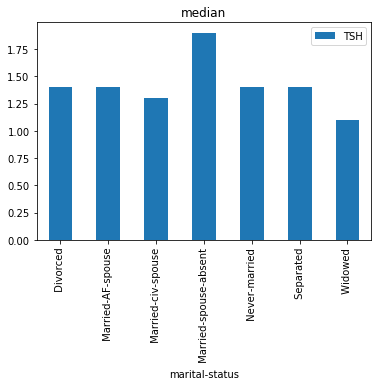

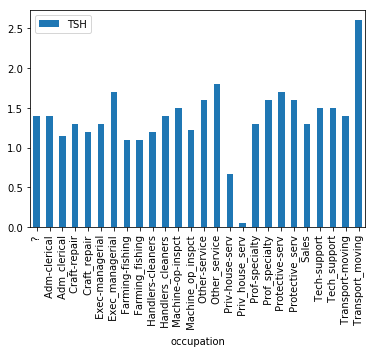

In [59]:
train_data.groupby('workclass').median()[['TSH']].plot(kind='bar', title='median', stacked=True)
train_data.groupby('education').median()[['TSH']].plot(kind='bar', title='median',stacked=True)
train_data.groupby('marital-status').median()[['TSH']].plot(kind='bar', title='median',stacked=True)
train_data.groupby('occupation').median()[['TSH']].plot(kind='bar', stacked=True)

Rôzne povolania mali v priemere aj pomerne odlišné váhy.

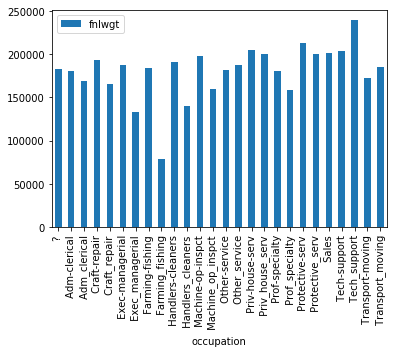

In [60]:
train_data.groupby('occupation').mean()[['fnlwgt']].plot(kind='bar', stacked=True)

Pozorovanie, že povolanie a vzdelanie spolu súvisia je triviálne.

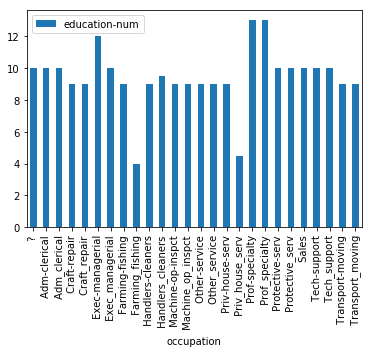

In [61]:
train_data.groupby('occupation').median()[['education-num']].plot(kind='bar', stacked=True)

Merania atribútov váhy a veku boli pre hodnotu Married-AF-spouse pomerne značne vychýlené.

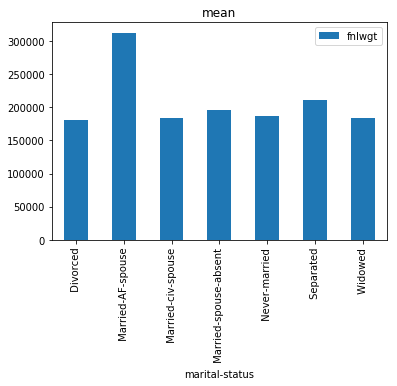

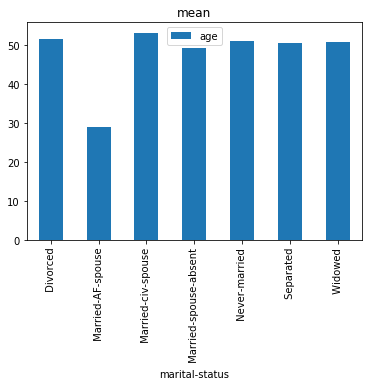

In [62]:
train_data.groupby('marital-status').mean()[['fnlwgt']].plot(kind='bar', title='mean',stacked=True)
train_data.groupby('marital-status').mean()[['age']].plot(kind='bar', title='mean',stacked=True)

Príslušníci rôznych rás majú v priemere rôznu finálnu váhu. Menšiu váhu majú pôvodný obyvatelia Ameriky či Ázie a Oceánie.

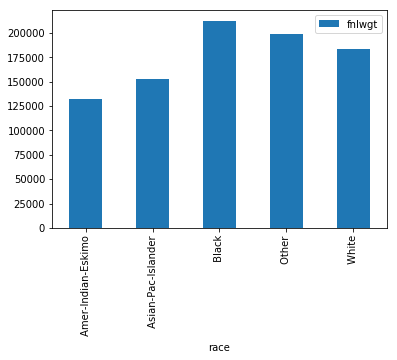

In [63]:
train_data.groupby('race').mean()[['fnlwgt']].plot(kind='bar', stacked=True)

Subjekty s dopytom po hyperthyroide mali v mediáne znížené TSH, približne na sedminu.

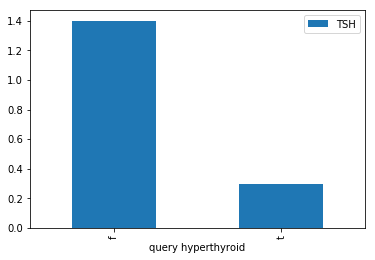

In [64]:
train_data.groupby('query hyperthyroid').median()[['TSH']].plot(kind='bar', stacked=True)

Subjekty s dopytom po hyperthyroide mali v priemere zvýšené T3, približne o štvrtinu.

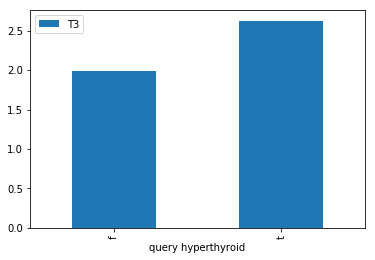

In [65]:
train_data.groupby('query hyperthyroid').mean()[['T3']].plot(kind='bar', stacked=True)

Subjekty s nameraným TT4 mali v mediáne znížené TSH, takmer o polovicu.

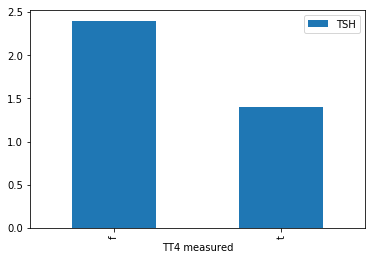

In [66]:
train_data.groupby('TT4 measured').median()[['TSH']].plot(kind='bar', stacked=True)

Subjekty na antithyroidovej medikácii mali v priemere nižší vek, približne o 11 rokov.

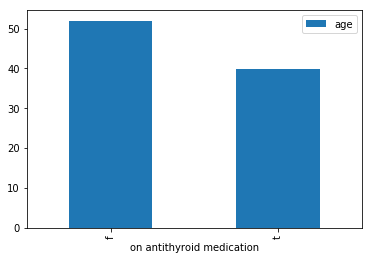

In [67]:
train_data.groupby('on antithyroid medication').mean()[['age']].plot(kind='bar', stacked=True)

Subjekty na antithyroidovej medikácii mali v mediáne znížené TSH, približne na sedminu.

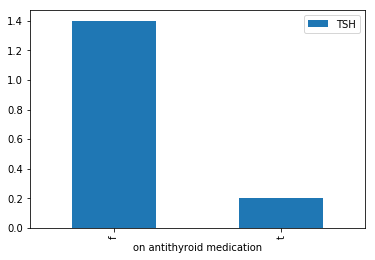

In [68]:
train_data.groupby('on antithyroid medication').median()[['TSH']].plot(kind='bar', stacked=True)

Subjekty na antithyroidovej medikácii mali v priemere zvýšené T3, približne o štvrtinu.

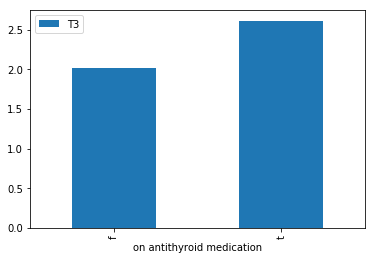

In [69]:
train_data.groupby('on antithyroid medication').mean()[['T3']].plot(kind='bar', stacked=True)

Subjekty s nameraným T4U mali v mediáne TSH menšie približne o 37 percent.

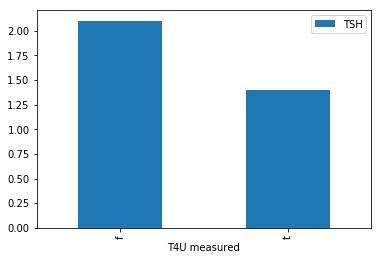

In [70]:
train_data.groupby('T4U measured').median()[['TSH']].plot(kind='bar', stacked=True)

Subjekty s dopytom po hypothyroide mali v mediáne zvýšené TSH, približne o dve tretiny.

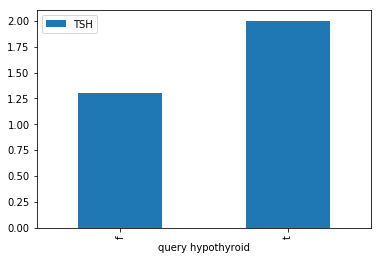

In [71]:
train_data.groupby('query hypothyroid').median()[['TSH']].plot(kind='bar', stacked=True)

Subjekty s negatívnym testom mali v mediáne zvýšené TSH v porovnaní so subjektami s nesúhlasným testom, o viac ako dvojnásobok.

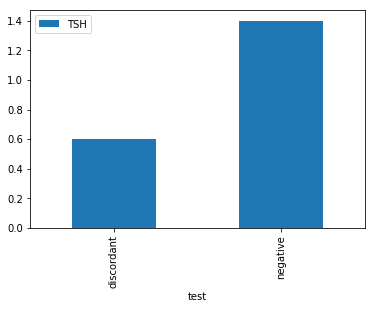

In [72]:
train_data.groupby('test').median()[['TSH']].plot(kind='bar', stacked=True)

Subjekty s negatívnym testom mali v mediáne zvýšené TSH v porovnaní so subjektami s nesúhlasným testom, o viac ako dvojnásobok.

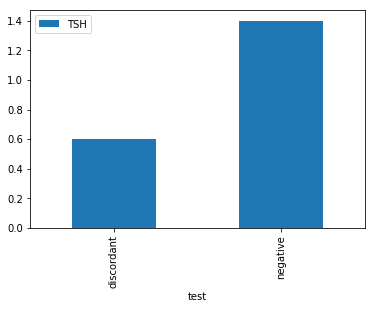

In [73]:
train_data.groupby('test').median()[['TSH']].plot(kind='bar', stacked=True)

Subjekty s negatívnym testom mali v priemere znížené TT4 v porovnaní so subjektami s nesúhlasným testom, približne o tretinu.

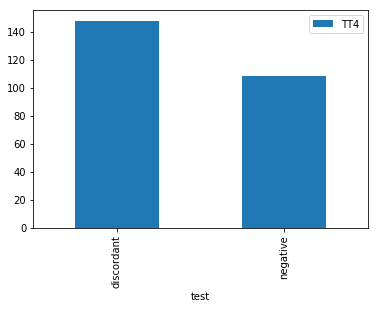

In [74]:
train_data.groupby('test').mean()[['TT4']].plot(kind='bar', stacked=True)

## 3.3 Spojité-spojité atribúty

Na vyhľadanie dvojíc korelujúcich atribútov sme použili nasledovný algoritmus:

In [75]:
for i in range(train_data.shape[1]):
    if np.issubdtype(train_data[train_data.columns[i]].dtype, np.number):
        for i2 in range(i, train_data.shape[1]):
            if np.issubdtype(train_data[train_data.columns[i2]].dtype, np.number):
                corr = train_data[train_data.columns[i]].corr(train_data[train_data.columns[i2]])
                if (corr > 0.2 or corr < -0.2) and train_data.columns[i] != train_data.columns[i2]:
                    print(train_data.columns[i], "-", train_data.columns[i2], " correlation: ", train_data[train_data.columns[i]].corr(train_data[train_data.columns[i2]]))
                    

age - T3  correlation:  -0.24237972891474738
TSH - TT4  correlation:  -0.2685525331664122
TSH - FTI  correlation:  -0.291188373868199
T3 - TT4  correlation:  0.5660571765652239
T3 - T4U  correlation:  0.46343405909602275
T3 - FTI  correlation:  0.3510133883173405
TT4 - T4U  correlation:  0.4339389434445414
TT4 - FTI  correlation:  0.798007458309882


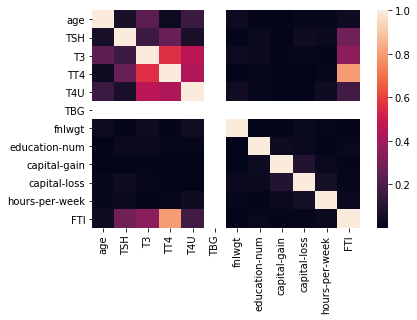

In [76]:
corr = train_data.corr()
seaborn.heatmap(abs(corr), 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Najvýraznejšia je pozitívna korelácia medzi TT4 a FTI (0.79). Táto je veľmi silná, teda atribúty TT4 a FTI majú veľmi znateľnú tendenciu sa spolu vyvíjať tým istým smerom (keď rastie jeden atribút, rastie aj druhý), čo možno vidieť aj na diagrame.

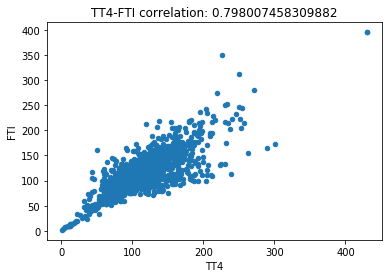

In [77]:
c1='TT4'
c2='FTI'
train_data.plot.scatter(x=c1, y=c2, title=c1 + "-" + c2 + " correlation: " + str(train_data[c1].corr(train_data[c2])))

T3 a TT4 (0.56) a T3 a T4U (0.46) majú ešte stále pomerne silnú poziívnu koreláciu.

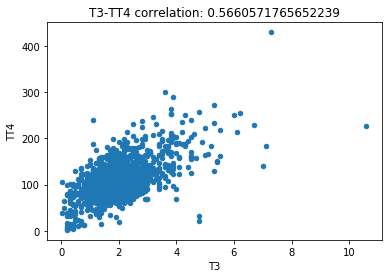

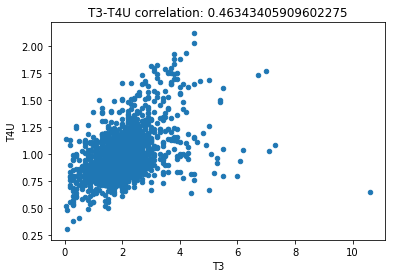

In [78]:
c1='T3'
c2='TT4'
train_data.plot.scatter(x=c1, y=c2, title=c1 + "-" + c2 + " correlation: " + str(train_data[c1].corr(train_data[c2])))
c1='T3'
c2='T4U'
train_data.plot.scatter(x=c1, y=c2, title=c1 + "-" + c2 + " correlation: " + str(train_data[c1].corr(train_data[c2])))

S FTI a T3 (0.35) už sila korelácie upadá.

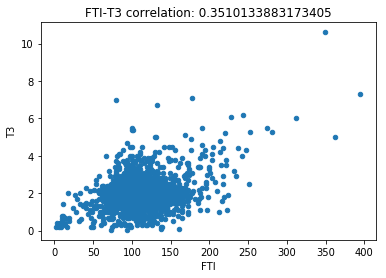

In [79]:
c1='FTI'
c2='T3'
train_data.plot.scatter(x=c1, y=c2, title=c1 + "-" + c2 + " correlation: " + str(train_data[c1].corr(train_data[c2])))

Slabšia je už negatívna korelácia medzi FTI a TSH (-0.29) TSH a TT4 (-0.24) a vekom a T3 (-0.24), čo znamená, že majú dvojice atribútov majú stále ešte istú tendenciu vyvíjať sa navzájom opačnými smermi (keď rastie jeden atribút, druhý klesá a naopak). 

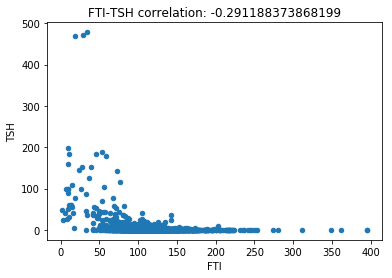

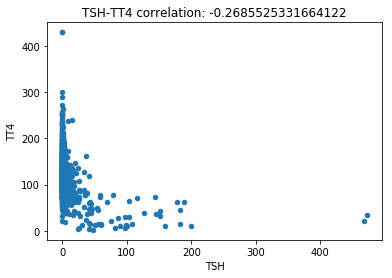

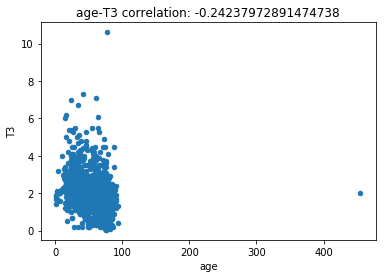

In [80]:
c1='FTI'
c2='TSH'
train_data.plot.scatter(x=c1, y=c2, title=c1 + "-" + c2 + " correlation: " + str(train_data[c1].corr(train_data[c2])))
c1='TSH'
c2='TT4'
train_data.plot.scatter(x=c1, y=c2, title=c1 + "-" + c2 + " correlation: " + str(train_data[c1].corr(train_data[c2])))
c1='age'
c2='T3'
train_data.plot.scatter(x=c1, y=c2, title=c1 + "-" + c2 + " correlation: " + str(train_data[c1].corr(train_data[c2])))

Korelácie medzi ostatnými dvojicami skupinových atribútov sú už zanedbateľné a vypovedajú skôr o nezávislosti dvojíc spojitých atribútov.

Na vizualizáciách korelácii je taktiež veľmi dobre vidieť niektoré odľahlé hodnoty, ktoré mohli mať vplyv na výpočet korelácie.

## 4 Závery exploratívnej analýzy

Cieľom našej exploratívnej analýzy bolo zistiť, či sa v dátach vyskytujú problémy, kvôli ktorým by sme mali ťažkosti pri budúcom narábaní s dátami. Pri analýze sme zistili, že mnoho atribútov nadobúda či už chybné alebo nekonzistentné hodnoty. Najvýraznejším takýmto atribútom bol atribút "medical-info", ktorý v sebe obsahoval niekoľko rôznych údajov, ktoré sme následne transformovali na nové atribúty. Touto skutočnosťou sme dosiahli jednotný formát dátového súboru, s ktorým budeme ďalej pracovať. Pri niektorých atribútoch sme si všimli, že pri nich chýbajú hodnoty. Taktiež sme pri takmer každom spojitom atribúte našli niekoľko odľahlých hodnôt. Najvýraznejším príkladom z nich by mohla byť hodnota atribútu age, ktorá dosahovala hodnotu - "455.0". Tieto hodnoty sme sa rozhodli pre ďalšiu prácu odstrániť či vhodne nahradiť. Najzaujímavejšími atribútmi, z pohľadu na ich hodnôt, sú atribúty ako capital-gain a capital-loss.

Z analýzy dvojíc atribútov vyplynuli okrem iného zaujímavé zistenia. Meranosť medicínskych meraní látok (TSH, FTI, T4U...) je so sebou silno zviazaná a medzi meranými hodnotami jednotlivých medicínskych meraní látok existujú pomerne silné korelácie v ich vývine. Prekvapivo, s vekom tieto korelujú len málo. Taktiež bola pozorovateľná silná previazanosť medicínskych atribútov nazvájom (ku príkladu zmena TSH v prítomnosti strumy, či tumoru) a pravdepodone aj čiastočná závilosť na referečnom zdroji, obdobne aj pomerne pozorovateľná naviazanosť niektorých spoločenskovedných atribútov navzájom, avšak len veľmi chabá a pochybná naviazanosť medicínskych atribútov na spoločenskovedné atribúty (povolanie, rasa, krajina pôvodu...) - čo vzišlo predovšetkým zo spojito-kategorickej analýzy. V skutočnosti sa zdalo, že jediným mostíkom medzi spoločenskovednými a medicínskymi meraniami je TSH, avšak aj to veľmi labilným a neistým. Zistenie, že neexistujú pozorovateľné naviazania hodnôt nadobúdaných atribútmi capital-gain, capital-loss a hours-per-week na zmenu ostatných atribútov nebolo vzhľadom na ich súčasný stav s akosi krkolomnou distribúciou neočakávané.

Problémy, ktoré ešte musíme počas fáze Predspracovania doriešiť sú nasledovné:
- zjednotenie formátu dátumu v atribúte date_of_birth
- zistenie naviazanosti atribútov date_of_birth a age
- unitárnosť atribútov TBG a TBG measured, ktoré neovplyvňujú v terajšej podobe dátového súboru žiaden iný atribút
- vychýlenosť spojitých číselných atribútov, ktoré možno z dátového súboru vylúčime, ale ako vhodnejšie riešenie sa nám pozdáva nahradenie 5-kvartilom, resp. 95-kvartilom, obzvlášť ak sa jedná o väčší počet hodnôt, či subjekty nesúce raritné hodnoty iných atribútov
- "rozbitosť" distribúcie atribútov capital-gain a capital-loss a čiastočne aj hours-per-week, ktoré sú v momentálnej podobe prakticky neanalyzvateľné (predovšetkým capital-gain a capital-loss) a ani sa nezdajú byť spojené s inými atribútmi
- identita atribútov education-num a education, zlúčenie nekonzistentných názvov hodnôt vyjadrujúcich tú istú vlastnosť atribútu education-num a následné overenie, či education-num a education skutočne majú tie isté hodnoty, prípadné odstránenie atribútu education-num, keďže dva atrbitúty vyjadrujúce to isté nie sú potrebné
- nahradenie chýbajúcich hodnôt atribútov nejakou štatistickou mierkou alebo inou vhodou metódou
- zlúčenie nekonzistentných názvov hodnôt vyjadrujúcich tú istú vlastnosť atribútov "on thyroxine" a "workclass"
- neľudské pracovné podmienky v niektorých častiach sveta

In [81]:
train_data.to_csv("data/explorovane.csv")